In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from scipy.stats import pearsonr, spearmanr


In [2]:
data = pd.read_csv('WPP2022_Demographic_Indicators_Medium.csv')

C:\Users\leonp\AppData\Local\Temp\ipykernel_16356\182097164.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('WPP2022_Demographic_Indicators_Medium.csv')


In [3]:
data.head()

SortOrder  LocID Notes ISO3_code ISO2_code  SDMX_code  LocTypeID  \
0          1    900   NaN       NaN       NaN        1.0          1   
1          1    900   NaN       NaN       NaN        1.0          1   
2          1    900   NaN       NaN       NaN        1.0          1   
3          1    900   NaN       NaN       NaN        1.0          1   
4          1    900   NaN       NaN       NaN        1.0          1   

  LocTypeName  ParentID Location  ...  Q0060Male Q0060Female     Q1550  \
0       World         0    World  ...   580.7496    498.0396  240.3164   
1       World         0    World  ...   566.7283    490.1993  231.1772   
2       World         0    World  ...   546.3173    477.2639  218.6745   
3       World         0    World  ...   535.8289    469.5325  212.8720   
4       World         0    World  ...   523.1236    458.4842  205.7622   

   Q1550Male  Q1550Female     Q1560  Q1560Male  Q1560Female  NetMigrations  \
0   271.6253     208.1916  378.6968   430.2594     324.9308            0.0   
1   258.0905     203.7797  368.3186   415.8362     319.3364            0.0   
2   240.0344     197.1422  353.0546   395.5327     309.9103            0.0   
3   232.6019     193.0492  345.0826   385.8433     303.9053            0.0   
4   224.0498     187.4439  335.4420   374.6576     295.9944            0.0   

   CNMR  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  

[5 rows x 67 columns]

In [4]:
data.shape

(43472, 67)

In [5]:
data.isnull().sum()

SortOrder            0
LocID                0
Notes            31920
ISO3_code         7448
ISO2_code         7600
                 ...  
Q1560              286
Q1560Male          286
Q1560Female        286
NetMigrations      286
CNMR               286
Length: 67, dtype: int64

In [6]:
data.duplicated().sum()

0

# Data Cleaning and Pre Processing 

In [7]:
pd.set_option('display.max_rows', None)
print(data.dtypes)

SortOrder                   int64
LocID                       int64
Notes                      object
ISO3_code                  object
ISO2_code                  object
SDMX_code                 float64
LocTypeID                   int64
LocTypeName                object
ParentID                    int64
Location                   object
VarID                       int64
Variant                    object
Time                        int64
TPopulation1Jan           float64
TPopulation1July          float64
TPopulationMale1July      float64
TPopulationFemale1July    float64
PopDensity                float64
PopSexRatio               float64
MedianAgePop              float64
NatChange                 float64
NatChangeRT               float64
PopChange                 float64
PopGrowthRate             float64
DoublingTime              float64
Births                    float64
Births1519                float64
CBR                       float64
TFR                       float64
NRR           

In [8]:
targetName = 'PopGrowthRate'

In [9]:
pop_growth_stats = data['PopGrowthRate'].describe()

print(pop_growth_stats)

count    43186.000000
mean         0.963947
std          1.596821
min        -71.689000
25%         -0.032000
50%          0.696000
75%          1.881750
max         36.299000
Name: PopGrowthRate, dtype: float64


In [10]:
def filter_outliers(group):
    mean_pop_growth = group['PopGrowthRate'].mean()
    std_pop_growth = group['PopGrowthRate'].std()
    
    lower_bound = mean_pop_growth - 2 * std_pop_growth
    upper_bound = mean_pop_growth + 2 * std_pop_growth
    
    return group[(group['PopGrowthRate'] >= lower_bound) & (group['PopGrowthRate'] <= upper_bound)]

filtered_data_cleaned = data.groupby('LocID').apply(filter_outliers).reset_index(drop=True)

print(f"Number of rows before filtering: {data.shape[0]}")
print(f"Number of rows after filtering: {filtered_data_cleaned.shape[0]}")

filtered_data_cleaned.head(1000)


Number of rows before filtering: 43472
Number of rows after filtering: 41919


SortOrder  LocID Notes ISO3_code ISO2_code  SDMX_code  LocTypeID  \
0          108      4   NaN       AFG        AF        4.0          4   
1          108      4   NaN       AFG        AF        4.0          4   
2          108      4   NaN       AFG        AF        4.0          4   
3          108      4   NaN       AFG        AF        4.0          4   
4          108      4   NaN       AFG        AF        4.0          4   
5          108      4   NaN       AFG        AF        4.0          4   
6          108      4   NaN       AFG        AF        4.0          4   
7          108      4   NaN       AFG        AF        4.0          4   
8          108      4   NaN       AFG        AF        4.0          4   
9          108      4   NaN       AFG        AF        4.0          4   
10         108      4   NaN       AFG        AF        4.0          4   
11         108      4   NaN       AFG        AF        4.0          4   
12         108      4   NaN       AFG        AF        4.0          4   
13         108      4   NaN       AFG        AF        4.0          4   
14         108      4   NaN       AFG        AF        4.0          4   
15         108      4   NaN       AFG        AF        4.0          4   
16         108      4   NaN       AFG        AF        4.0          4   
17         108      4   NaN       AFG        AF        4.0          4   
18         108      4   NaN       AFG        AF        4.0          4   
19         108      4   NaN       AFG        AF        4.0          4   
20         108      4   NaN       AFG        AF        4.0          4   
21         108      4   NaN       AFG        AF        4.0          4   
22         108      4   NaN       AFG        AF        4.0          4   
23         108      4   NaN       AFG        AF        4.0          4   
24         108      4   NaN       AFG        AF        4.0          4   
25         108      4   NaN       AFG        AF        4.0          4   
26         108      4   NaN       AFG        AF        4.0          4   
27         108      4   NaN       AFG        AF        4.0          4   
28         108      4   NaN       AFG        AF        4.0          4   
29         108      4   NaN       AFG        AF        4.0          4   
30         108      4   NaN       AFG        AF        4.0          4   
31         108      4   NaN       AFG        AF        4.0          4   
32         108      4   NaN       AFG        AF        4.0          4   
33         108      4   NaN       AFG        AF        4.0          4   
34         108      4   NaN       AFG        AF        4.0          4   
35         108      4   NaN       AFG        AF        4.0          4   
36         108      4   NaN       AFG        AF        4.0          4   
37         108      4   NaN       AFG        AF        4.0          4   
38         108      4   NaN       AFG        AF        4.0          4   
39         108      4   NaN       AFG        AF        4.0          4   
40         108      4   NaN       AFG        AF        4.0          4   
41         108      4   NaN       AFG        AF        4.0          4   
42         108      4   NaN       AFG        AF        4.0          4   
43         108      4   NaN       AFG        AF        4.0          4   
44         108      4   NaN       AFG        AF        4.0          4   
45         108      4   NaN       AFG        AF        4.0          4   
46         108      4   NaN       AFG        AF        4.0          4   
47         108      4   NaN       AFG        AF        4.0          4   
48         108      4   NaN       AFG        AF        4.0          4   
49         108      4   NaN       AFG        AF        4.0          4   
50         108      4   NaN       AFG        AF        4.0          4   
51         108      4   NaN       AFG        AF        4.0          4   
52         108      4   NaN       AFG        AF        4.0          4   
53         108      4   NaN       AFG        AF        4.0     

C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.ty

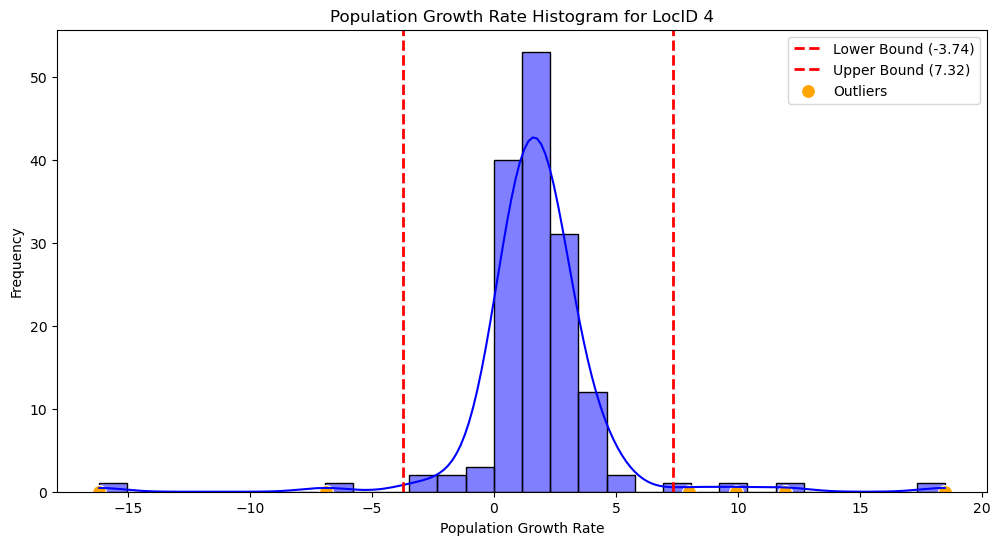

In [11]:
loc_id = 4  

loc_data = data[data['LocID'] == loc_id]

mean_pop_growth = loc_data['PopGrowthRate'].mean()
std_pop_growth = loc_data['PopGrowthRate'].std()

lower_bound = mean_pop_growth - 2 * std_pop_growth
upper_bound = mean_pop_growth + 2 * std_pop_growth

plt.figure(figsize=(12, 6))
sns.histplot(loc_data['PopGrowthRate'], bins=30, kde=True, color='blue', alpha=0.5)

plt.axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper Bound ({upper_bound:.2f})')


outliers = loc_data[(loc_data['PopGrowthRate'] < lower_bound) | (loc_data['PopGrowthRate'] > upper_bound)]
sns.scatterplot(x=outliers['PopGrowthRate'], y=[0] * len(outliers), color='orange', s=100, label='Outliers')


plt.title(f'Population Growth Rate Histogram for LocID {loc_id}')
plt.xlabel('Population Growth Rate')
plt.ylabel('Frequency')
plt.legend()

plt.show()


In [12]:
filtered_data_cleaned['PopGrowthRate'].describe()

count    41919.000000
mean         0.908537
std          1.322409
min         -5.961000
25%         -0.043000
50%          0.662000
75%          1.803500
max         11.613000
Name: PopGrowthRate, dtype: float64

In [13]:
filtered_data_cleaned.shape

(41919, 67)

In [14]:
filtered_data_cleaned.isnull().sum()

SortOrder                     0
LocID                         0
Notes                     30916
ISO3_code                  7300
ISO2_code                  7449
SDMX_code                   600
LocTypeID                     0
LocTypeName                   0
ParentID                      0
Location                      0
VarID                         0
Variant                       0
Time                          0
TPopulation1Jan               0
TPopulation1July              0
TPopulationMale1July          0
TPopulationFemale1July        0
PopDensity                    0
PopSexRatio                   0
MedianAgePop                  0
NatChange                     0
NatChangeRT                   0
PopChange                     0
PopGrowthRate                 0
DoublingTime              18713
Births                        0
Births1519                    0
CBR                           0
TFR                           0
NRR                           0
MAC                           0
SRB     

In [15]:
featureNames = ['LocID','TPopulation1July', 'TPopulationMale1July',
                'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
                'NatChange', 'NatChangeRT', 'PopChange', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC',
                'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale',
                'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 'LE65Male',
                'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR',
                'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040', 'Q0040Male',
                'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550',
                'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female',
                'CNMR']


id_values = [np.NaN, np.inf, -np.inf]


missingRows = filtered_data_cleaned[featureNames].applymap(lambda x: x in id_values).any(axis=1)


num_missing_rows = missingRows.sum()

print(f"Number of rows with NaN, Inf, or -Inf in the specified columns: {num_missing_rows}")
if num_missing_rows > 0:
    print(f"Rows with problematic values: \n{filtered_data_cleaned[missingRows]}")


cleanTable = filtered_data_cleaned[~missingRows]


print(cleanTable)
print(f"Original number of rows: {len(filtered_data_cleaned)}, After cleaning: {len(cleanTable)}")

C:\Users\leonp\AppData\Local\Temp\ipykernel_16356\3280926872.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  missingRows = filtered_data_cleaned[featureNames].applymap(lambda x: x in id_values).any(axis=1)


Number of rows with NaN, Inf, or -Inf in the specified columns: 0


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
cleanTable = cleanTable[cleanTable['CNMR'] != 0]

print(f"Original number of rows: {len(filtered_data_cleaned)}, After cleaning: {len(cleanTable)}")

Original number of rows: 41919, After cleaning: 39178


In [17]:
cleanTable.shape

(39178, 67)

In [18]:
cleanTable.describe()

SortOrder         LocID     SDMX_code     LocTypeID      ParentID  \
count  39178.000000  39178.000000  38578.000000  39178.000000  39178.000000   
mean     145.431084    607.874011    407.784022      4.352570   1233.737174   
std       82.637703    583.100571    269.975660      1.971314   1014.909431   
min        3.000000      4.000000      2.000000      2.000000    902.000000   
25%       74.000000    266.000000    156.000000      4.000000    914.000000   
50%      145.000000    528.000000    412.000000      4.000000    922.000000   
75%      216.000000    800.000000    642.000000      4.000000    931.000000   
max      290.000000   5501.000000    914.000000     13.000000   5501.000000   

         VarID          Time  TPopulation1Jan  TPopulation1July  \
count  39178.0  39178.000000     3.917800e+04      3.917800e+04   
mean       2.0   2025.495712     2.378975e+05      2.387601e+05   
std        0.0     42.961021     8.729664e+05      8.752657e+05   
min        2.0   1950.000000     5.080000e-01      5.100000e-01   
25%        2.0   1989.000000     9.260297e+02      9.291273e+02   
50%        2.0   2025.000000     8.768489e+03      8.801207e+03   
75%        2.0   2063.000000     5.490729e+04      5.517629e+04   
max        2.0   2100.000000     9.254143e+06      9.254019e+06   

       TPopulationMale1July  ...     Q0060Male   Q0060Female         Q1550  \
count          3.917800e+04  ...  39178.000000  39178.000000  39178.000000   
mean           1.195247e+05  ...    230.837740    166.998693     88.428233   
std            4.389921e+05  ...    170.004569    156.701362     81.965625   
min            2.460000e-01  ...      7.665600      3.686800      2.164700   
25%            4.621785e+02  ...     91.653350     51.050025     28.519375   
50%            4.350736e+03  ...    195.355350    111.663300     62.979200   
75%            2.722408e+04  ...    322.996825    228.314050    118.418150   
max            4.608232e+06  ...    987.465600    918.279600    815.209100   

          Q1550Male   Q1550Female         Q1560     Q1560Male   Q1560Female  \
count  39178.000000  39178.000000  39178.000000  39178.000000  39178.000000   
mean     104.626551     71.727028    160.904170    191.571806    129.283070   
std       89.337382     76.055099    118.591979    128.855813    110.283398   
min        2.904400      1.328700      5.556600      7.446900      3.576300   
25%       36.793700     19.488350     65.921325     84.937175     45.568225   
50%       81.294900     43.247000    135.960800    173.245300     95.633650   
75%      143.881350     92.922100    222.371400    266.495325    177.595850   
max      944.593400    692.573700    895.405600    977.741300    816.105200   

       NetMigrations          CNMR  
count    39178.00000  39178.000000  
mean       -30.42988     -0.332051  
std        438.39173      7.304151  
min      -8636.20200    -83.684000  
25%        -17.19225     -1.562750  
50%         -1.00000     -0.262000  
75%          2.40900      1.122000  
max       7674.48400    102.987000  

[8 rows x 61 columns]

In [19]:
cleanTable.to_csv('demographiccleaned.csv')

# Data exploration and visualizations

In [20]:
cleanTable1 = pd.read_csv('demographiccleaned.csv')

C:\Users\leonp\AppData\Local\Temp\ipykernel_16356\4216480803.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  cleanTable1 = pd.read_csv('demographiccleaned.csv')


In [21]:
cleanTable1.head(5)

Unnamed: 0  SortOrder  LocID Notes ISO3_code ISO2_code  SDMX_code  \
0           0        108      4   NaN       AFG        AF        4.0   
1           1        108      4   NaN       AFG        AF        4.0   
2           2        108      4   NaN       AFG        AF        4.0   
3           3        108      4   NaN       AFG        AF        4.0   
4           4        108      4   NaN       AFG        AF        4.0   

   LocTypeID   LocTypeName  ParentID  ... Q0060Male  Q0060Female     Q1550  \
0          4  Country/Area      5501  ...  821.7257     791.6154  471.1456   
1          4  Country/Area      5501  ...  818.9690     788.6250  468.0905   
2          4  Country/Area      5501  ...  813.4744     782.5637  462.1612   
3          4  Country/Area      5501  ...  808.0105     776.4088  456.3798   
4          4  Country/Area      5501  ...  805.0122     773.6825  454.5300   

   Q1550Male  Q1550Female     Q1560  Q1560Male  Q1560Female  NetMigrations  \
0   483.2220     455.6758  639.3338   660.2852     611.0236          6.161   
1   480.2197     452.7227  636.0979   657.2306     607.8925          4.903   
2   474.4185     446.8132  629.8848   651.3446     601.5991          0.145   
3   468.8737     440.9133  623.8254   645.7408     595.2785         -8.867   
4   466.7038     439.6024  621.7429   643.5345     593.6795         -6.837   

    CNMR  
0  0.824  
1  0.648  
2  0.019  
3 -1.141  
4 -0.869  

[5 rows x 68 columns]

In [22]:
cleanTable1.shape

(39178, 68)

# Visualizing Births and PopGrowthRate

In [23]:
num_bins = 10


cleanTable1['Births_bins'] = pd.qcut(cleanTable1['Births'], q=num_bins, labels=False)

mean_births = cleanTable1.groupby('Births_bins')['Births'].mean().reset_index(name='Mean_Births')
mean_pop_growth_rate = cleanTable1.groupby('Births_bins')['PopGrowthRate'].mean().reset_index(name='Mean_PopGrowthRate')

mean_data = pd.merge(mean_births, mean_pop_growth_rate, on='Births_bins')

print(mean_data)

   Births_bins   Mean_Births  Mean_PopGrowthRate
0            0      0.401062            0.497282
1            1      3.639682            0.798059
2            2     15.773058            0.628595
3            3     51.530818            0.710153
4            4    111.104414            0.959732
5            5    242.310801            1.182692
6            6    485.780847            1.191205
7            7    991.883790            1.222170
8            8   3516.045759            1.151328
9            9  36062.827977            1.120715


C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

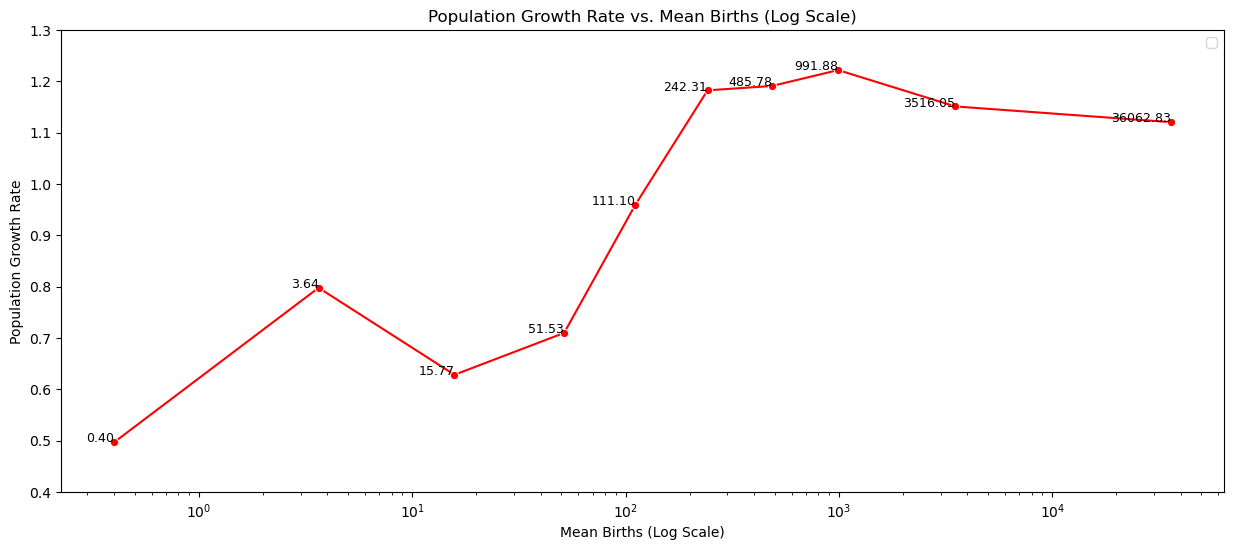

In [24]:
mean_data = pd.DataFrame({
    'Births_bins': range(10),
    'Mean_Births': [0.401062, 3.639682, 15.773058, 51.530818, 111.104414, 242.310801, 485.780847, 991.883790, 3516.045759, 36062.827977],
    'Mean_PopGrowthRate': [0.497282, 0.798059, 0.628595, 0.710153, 0.959732, 1.182692, 1.191205, 1.222170, 1.151328, 1.120715]
})

plt.figure(figsize=(15, 6))
sns.lineplot(x='Mean_Births', y='Mean_PopGrowthRate', data=mean_data, marker='o',color= 'red')
plt.xscale('log')
plt.title('Population Growth Rate vs. Mean Births (Log Scale)')
plt.xlabel('Mean Births (Log Scale)')
plt.ylabel('Population Growth Rate')

for i in range(len(mean_data)):
    plt.text(mean_data['Mean_Births'][i], mean_data['Mean_PopGrowthRate'][i], f'{mean_data["Mean_Births"][i]:.2f}', fontsize=9, ha='right')

plt.legend()
plt.ylim(0.4, 1.3)
plt.show()


In [25]:
num_bins = 10

cleanTable1['CBR_bins'] = pd.qcut(cleanTable1['CBR'], q=num_bins, labels=False)

mean_CBR = cleanTable1.groupby('CBR_bins')['CBR'].mean().reset_index(name='Mean_CBR')
mean_pop_growth_rate = cleanTable1.groupby('CBR_bins')['PopGrowthRate'].mean().reset_index(name='Mean_PopGrowthRate')

mean_data = pd.merge(mean_CBR, mean_pop_growth_rate, on='CBR_bins')

print(mean_data)

   CBR_bins   Mean_CBR  Mean_PopGrowthRate
0         0   7.349779           -0.558307
1         1   8.926760           -0.181752
2         2  10.139721            0.037646
3         3  11.996449            0.287861
4         4  14.392417            0.576625
5         5  17.349866            0.913562
6         6  21.643419            1.341940
7         7  28.325936            1.873668
8         8  37.591556            2.442710
9         9  47.025663            2.728525


C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

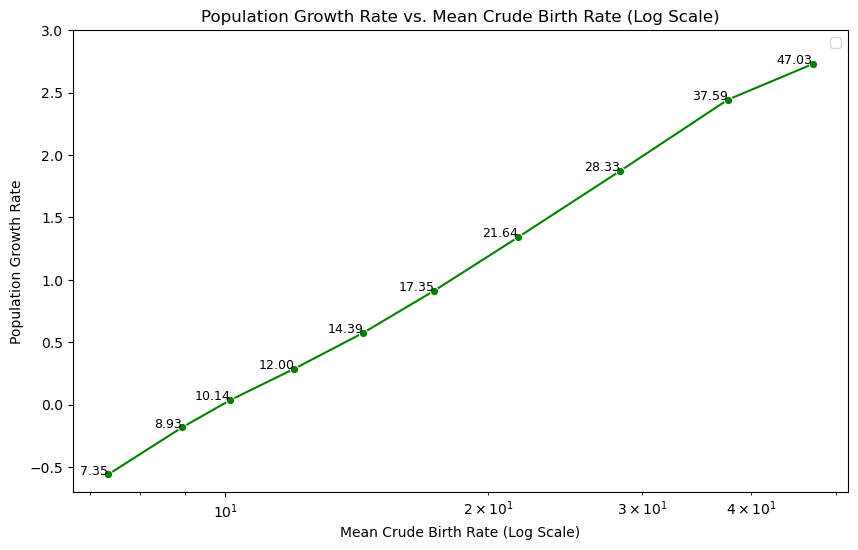

In [26]:
mean_data_cbr = pd.DataFrame({
    'CBR_bins': range(10),
    'Mean_CBR': [7.349779, 8.926760, 10.139721, 11.996449, 14.392417, 17.349866, 21.643419, 28.325936, 37.591556, 47.025663],
    'Mean_PopGrowthRate': [-0.558307, -0.181752, 0.037646, 0.287861, 0.576625, 0.913562, 1.341940, 1.873668, 2.442710, 2.728525]
})

plt.figure(figsize=(10, 6))
sns.lineplot(x='Mean_CBR', y='Mean_PopGrowthRate', data=mean_data_cbr, marker='o', color='green')  # Change color here
plt.xscale('log')
plt.title('Population Growth Rate vs. Mean Crude Birth Rate (Log Scale)')
plt.xlabel('Mean Crude Birth Rate (Log Scale)')
plt.ylabel('Population Growth Rate')

for i in range(len(mean_data_cbr)):
    plt.text(mean_data_cbr['Mean_CBR'][i], mean_data_cbr['Mean_PopGrowthRate'][i], f'{mean_data_cbr["Mean_CBR"][i]:.2f}', fontsize=9, ha='right')

plt.legend()
plt.ylim(-0.7, 3)
plt.show()

# Visualizing Deaths and PopGrowthRate

In [27]:
num_bins = 10


cleanTable1['Deaths_bins'] = pd.qcut(cleanTable1['Deaths'], q=num_bins, labels=False)


mean_deaths = cleanTable1.groupby('Deaths_bins')['Deaths'].mean().reset_index(name='Mean_Deaths')
mean_pop_growth_rate = cleanTable1.groupby('Deaths_bins')['PopGrowthRate'].mean().reset_index(name='Mean_PopGrowthRate')


mean_data = pd.merge(mean_deaths, mean_pop_growth_rate, on='Deaths_bins')

print(mean_data)

   Deaths_bins   Mean_Deaths  Mean_PopGrowthRate
0            0      0.296098            0.795016
1            1      1.791742            0.981557
2            2     10.115783            1.052903
3            3     31.832900            0.793397
4            4     67.563670            1.059193
5            5    124.472065            0.988427
6            6    247.652093            1.303459
7            7    553.395487            0.768191
8            8   1967.985504            0.902036
9            9  20921.633076            0.817702


C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

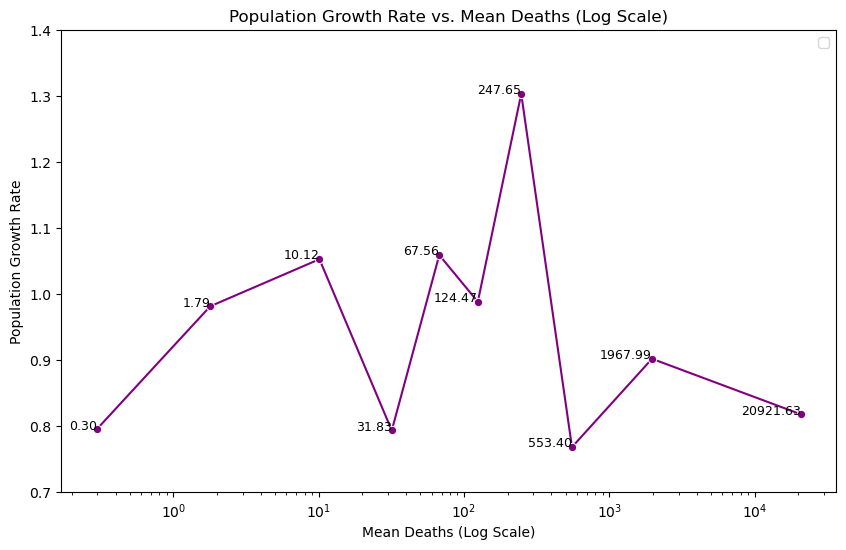

In [28]:
mean_data_deaths = pd.DataFrame({
    'Deaths_bins': range(10),
    'Mean_Deaths':[0.296098, 1.791742, 10.115783, 31.832900, 67.563670, 124.472065, 247.652093, 553.395487, 1967.985504, 20921.633076],
    'Mean_PopGrowthRate': [0.795016, 0.981557, 1.052903, 0.793397, 1.059193, 0.988427, 1.303459, 0.768191, 0.902036, 0.817702]
})

plt.figure(figsize=(10, 6))
sns.lineplot(x='Mean_Deaths', y='Mean_PopGrowthRate', data=mean_data_deaths, marker='o', color='purple')  # Change color here
plt.xscale('log')
plt.title('Population Growth Rate vs. Mean Deaths (Log Scale)')
plt.xlabel('Mean Deaths (Log Scale)')
plt.ylabel('Population Growth Rate')


for i in range(len(mean_data_deaths)):
    plt.text(mean_data_deaths['Mean_Deaths'][i], mean_data_deaths['Mean_PopGrowthRate'][i], f'{mean_data_deaths["Mean_Deaths"][i]:.2f}', fontsize=9, ha='right')

plt.legend()
plt.ylim(0.7, 1.4)
plt.show()

In [29]:
num_bins = 10

cleanTable1['CDR_bins'] = pd.qcut(cleanTable1['CDR'], q=num_bins, labels=False)


mean_CDR = cleanTable1.groupby('CDR_bins')['CDR'].mean().reset_index(name='Mean_CDR')
mean_pop_growth_rate = cleanTable1.groupby('CDR_bins')['PopGrowthRate'].mean().reset_index(name='Mean_PopGrowthRate')


mean_data = pd.merge(mean_CDR, mean_pop_growth_rate, on='CDR_bins')

print(mean_data)

   CDR_bins   Mean_CDR  Mean_PopGrowthRate
0         0   4.937629            1.822297
1         1   6.570400            1.334611
2         2   7.493827            1.219665
3         3   8.436262            1.011749
4         4   9.367810            0.751597
5         5  10.289675            0.635900
6         6  11.381839            0.455341
7         7  12.706110            0.261691
8         8  14.696864            0.275056
9         9  20.733257            1.693042


C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

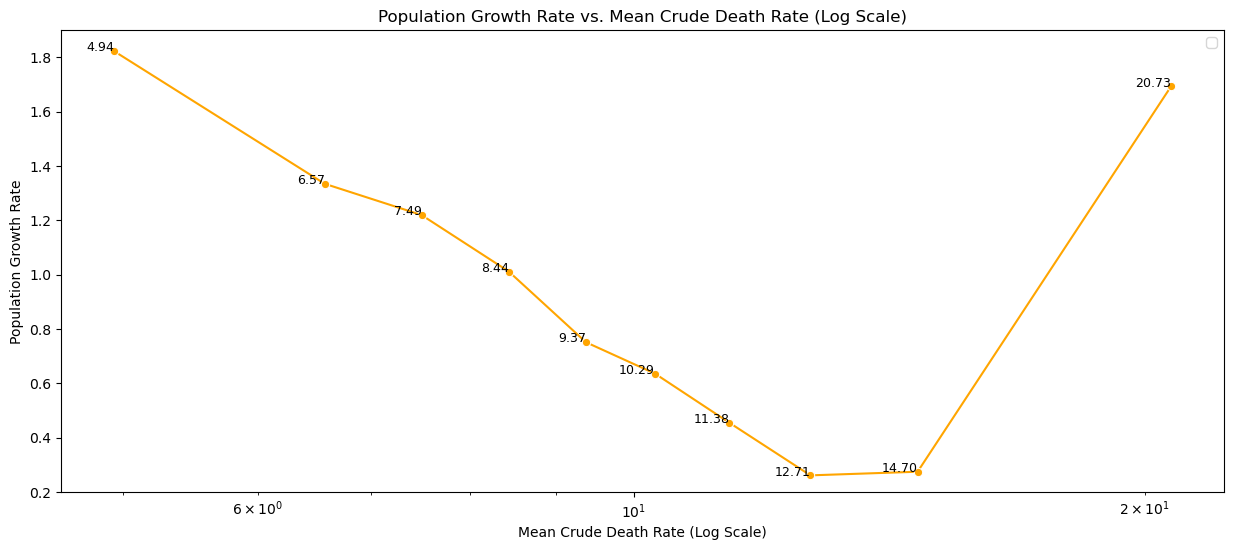

In [30]:
mean_data_cdr = pd.DataFrame({
    'CDR_bins': range(10),
    'Mean_CDR':[4.937629, 6.570400, 7.493827, 8.436262, 9.367810, 10.289675, 11.381839, 12.706110, 14.696864, 20.733257],
    'Mean_PopGrowthRate': [1.822297, 1.334611, 1.219665, 1.011749, 0.751597, 0.635900, 0.455341, 0.261691, 0.275056, 1.693042]
})


plt.figure(figsize=(15, 6))
sns.lineplot(x='Mean_CDR', y='Mean_PopGrowthRate', data=mean_data_cdr, marker='o', color='orange')  # Change color here
plt.xscale('log')
plt.title('Population Growth Rate vs. Mean Crude Death Rate (Log Scale)')
plt.xlabel('Mean Crude Death Rate (Log Scale)')
plt.ylabel('Population Growth Rate')


for i in range(len(mean_data_cdr)):
    plt.text(mean_data_cdr['Mean_CDR'][i], mean_data_cdr['Mean_PopGrowthRate'][i], f'{mean_data_cdr["Mean_CDR"][i]:.2f}', fontsize=9, ha='right')

plt.legend()
plt.ylim(0.2, 1.9)
plt.show()

# Visualizing Migrations and PopGrowthRate

In [31]:
num_bins = 10


cleanTable1['NetMigrations_bins'] = pd.qcut(cleanTable1['NetMigrations'], q=num_bins, labels=False)


mean_NetMigrations = cleanTable1.groupby('NetMigrations_bins')['NetMigrations'].mean().reset_index(name='Mean_NetMigrations')
mean_pop_growth_rate = cleanTable1.groupby('NetMigrations_bins')['PopGrowthRate'].mean().reset_index(name='Mean_PopGrowthRate')


mean_data = pd.merge(mean_NetMigrations, mean_pop_growth_rate, on='NetMigrations_bins')

print(mean_data)

   NetMigrations_bins  Mean_NetMigrations  Mean_PopGrowthRate
0                   0         -730.715942            1.049261
1                   1          -58.479304            0.978901
2                   2          -16.826987            1.018760
3                   3           -6.066235            0.818604
4                   4           -2.062255            0.837724
5                   5           -0.434459            0.457533
6                   6            0.207173            0.794335
7                   7            2.970710            1.406520
8                   8           23.404584            1.120087
9                   9          485.986644            0.937569


C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

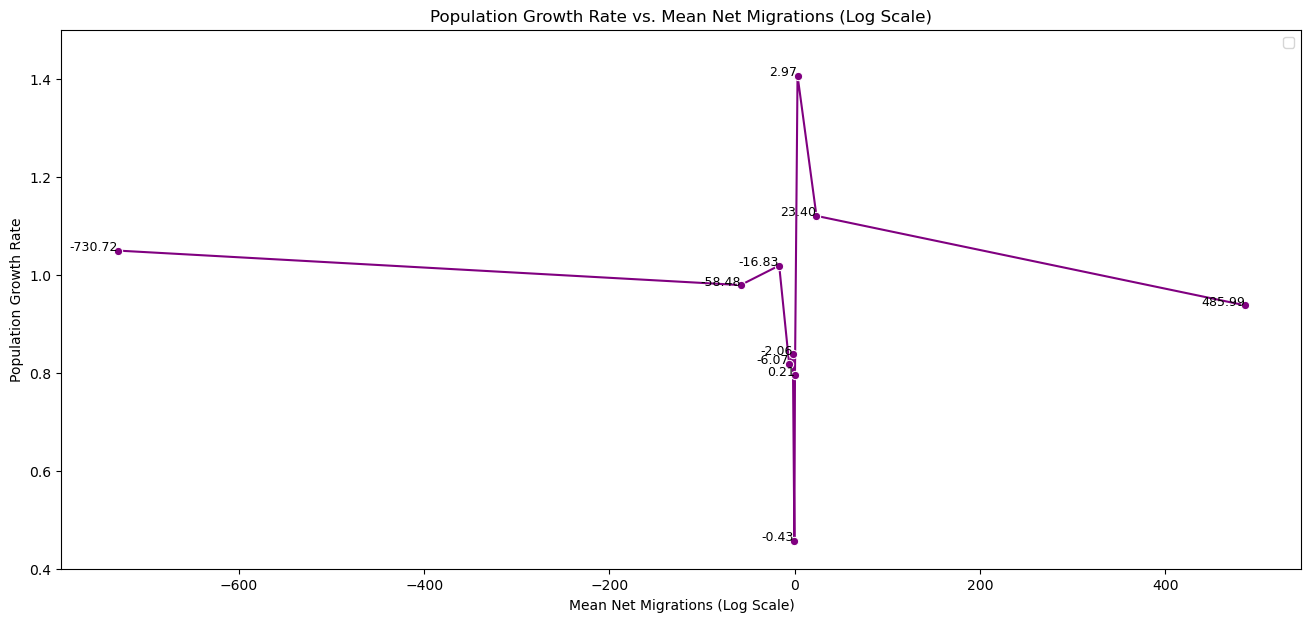

In [32]:
mean_data_net_migrations = pd.DataFrame({
    'NetMigrations_bins': range(10),
    'Mean_NetMigrations': [-730.715942, -58.479304, -16.826987, -6.066235, -2.062255, -0.434459, 0.207173, 2.970710, 23.404584, 485.986644],
    'Mean_PopGrowthRate': [1.049261, 0.978901, 1.018760, 0.818604, 0.837724, 0.457533, 0.794335, 1.406520, 1.120087, 0.937569]
})


plt.figure(figsize=(16, 7))
sns.lineplot(x='Mean_NetMigrations', y='Mean_PopGrowthRate', data=mean_data_net_migrations, marker='o', color='purple')  # Change color here
plt.title('Population Growth Rate vs. Mean Net Migrations (Log Scale)')
plt.xlabel('Mean Net Migrations (Log Scale)')
plt.ylabel('Population Growth Rate')


for i in range(len(mean_data_net_migrations)):
    plt.text(mean_data_net_migrations['Mean_NetMigrations'][i], mean_data_net_migrations['Mean_PopGrowthRate'][i], f'{mean_data_net_migrations["Mean_NetMigrations"][i]:.2f}', fontsize=9, ha='right')

plt.legend()
plt.ylim(0.4, 1.5)
plt.show()

In [33]:
num_bins = 10

cleanTable1['CNMR_bins'] = pd.qcut(cleanTable1['CNMR'], q=num_bins, labels=False)

mean_CNMR = cleanTable1.groupby('CNMR_bins')['CNMR'].mean().reset_index(name='Mean_CNMR')
mean_pop_growth_rate = cleanTable1.groupby('CNMR_bins')['PopGrowthRate'].mean().reset_index(name='Mean_PopGrowthRate')

mean_data = pd.merge(mean_CNMR, mean_pop_growth_rate, on='CNMR_bins')

print(mean_data)

   CNMR_bins  Mean_CNMR  Mean_PopGrowthRate
0          0 -12.779520            0.555761
1          1  -3.517351            1.020758
2          2  -1.594371            1.000683
3          3  -0.745859            0.824845
4          4  -0.367910            0.711285
5          5  -0.161931            0.845018
6          6   0.224606            1.054013
7          7   1.180704            0.630534
8          8   2.836202            0.670506
9          9  11.611860            2.148991


C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

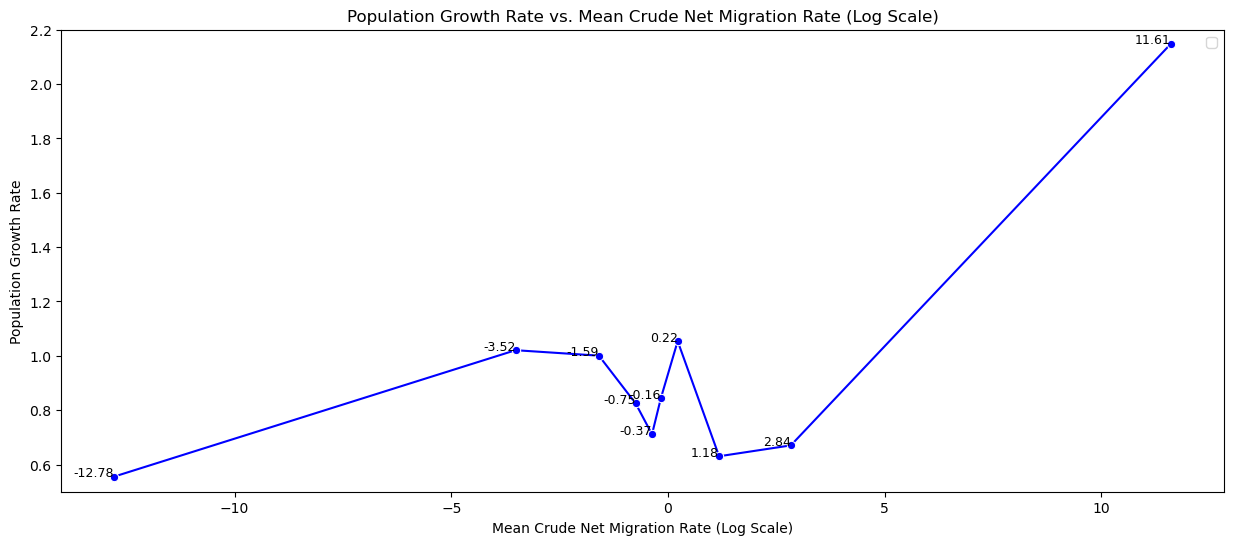

In [34]:
mean_data_cnmr = pd.DataFrame({
    'CNMR_bins': range(10),
    'Mean_CNMR': [-12.779520, -3.517351, -1.594371, -0.745859, -0.367910, -0.161931, 0.224606, 1.180704, 2.836202, 11.611860],
    'Mean_PopGrowthRate': [0.555761, 1.020758, 1.000683, 0.824845, 0.711285, 0.845018, 1.054013, 0.630534, 0.670506, 2.148991]
})


plt.figure(figsize=(15, 6))
sns.lineplot(x='Mean_CNMR', y='Mean_PopGrowthRate', data=mean_data_cnmr, marker='o', color='blue')  # Change color here
plt.title('Population Growth Rate vs. Mean Crude Net Migration Rate (Log Scale)')
plt.xlabel('Mean Crude Net Migration Rate (Log Scale)')
plt.ylabel('Population Growth Rate')


for i in range(len(mean_data_cnmr)):
    plt.text(mean_data_cnmr['Mean_CNMR'][i], mean_data_cnmr['Mean_PopGrowthRate'][i], f'{mean_data_cnmr["Mean_CNMR"][i]:.2f}', fontsize=9, ha='right')

plt.legend()
plt.ylim(0.5, 2.2)
plt.show()


# Correlation Analysis 

In [35]:
# First we calculate the pearsons and spearmans correlation coefficents foe a specific one or two locations and see that the correlations are different for different locations.
# Then we calculate the pearsons and spearmans correlation for all the loc ids and take the weighted average for all the loc ids for all the variables.
# After this we plot graphs and select the variables that have high pearsons and spearmans correlation coefficent values and go ahead with the selected attributes


# Pearsons and Spearmans correlation for a specific location ID 

In [36]:
def calculate_correlations(cleanTable1, LocID, attribute1, attribute2):
   
    location_data = cleanTable1[cleanTable1['LocID'] == locID]

    clean_data = location_data[[attribute1, attribute2]].dropna()
    
    if clean_data.empty:
        print(f"No valid data available to calculate correlation between {attribute1} and {attribute2} for LocID {locID}.")
        return
    
   
    pearson_corr, pearson_p_value = pearsonr(clean_data[attribute1], clean_data[attribute2])
    
    spearman_corr, spearman_p_value = spearmanr(clean_data[attribute1], clean_data[attribute2])
    
    print(f"Location ID: {locID}")
    print(f"Fixed Attribute: {attribute1}")
    print(f"Variable Attribute: {attribute2}")
    print("Pearson Correlation Coefficient:", pearson_corr)
    print("Pearson P-value:", pearson_p_value)
    print("Spearman Correlation Coefficient:", spearman_corr)
    print("Spearman P-value:", spearman_p_value)
    print("\n")
    
    return {
        'pearson_corr': pearson_corr,
        'pearson_p_value': pearson_p_value,
        'spearman_corr': spearman_corr,
        'spearman_p_value': spearman_p_value
    }


locID = 4
attribute1 = 'PopGrowthRate'
attributes = ['TPopulation1July', 'TPopulationMale1July', 'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
              'NatChange', 'NatChangeRT', 'PopChange', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC', 'Deaths',
              'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale', 'LExFemale', 'LE15', 'LE15Male', 'LE15Female',
              'LE65', 'LE65Male', 'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR', 'LBsurvivingAge1',
              'Q5', 'Q0040', 'Q0040Male', 'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550', 'Q1550Male',
              'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female', 'CNMR']


correlations = {}
for attribute2 in attributes:
    correlations[attribute2] = calculate_correlations(data, locID, attribute1, attribute2)


Location ID: 4
Fixed Attribute: PopGrowthRate
Variable Attribute: TPopulation1July
Pearson Correlation Coefficient: -0.22410494759126576
Pearson P-value: 0.005670705749552232
Spearman Correlation Coefficient: -0.45674142274452917
Spearman P-value: 3.755147712397892e-09


Location ID: 4
Fixed Attribute: PopGrowthRate
Variable Attribute: TPopulationMale1July
Pearson Correlation Coefficient: -0.22304141371543298
Pearson P-value: 0.005909358773580144
Spearman Correlation Coefficient: -0.45498122602075997
Spearman P-value: 4.382811202565713e-09


Location ID: 4
Fixed Attribute: PopGrowthRate
Variable Attribute: TPopulationFemale1July
Pearson Correlation Coefficient: -0.22511254450061502
Pearson P-value: 0.0054525824069435284
Spearman Correlation Coefficient: -0.45770517402001865
Spearman P-value: 3.449153723444579e-09


Location ID: 4
Fixed Attribute: PopGrowthRate
Variable Attribute: PopDensity
Pearson Correlation Coefficient: -0.22410492824307537
Pearson P-value: 0.005670710011766213
Spea

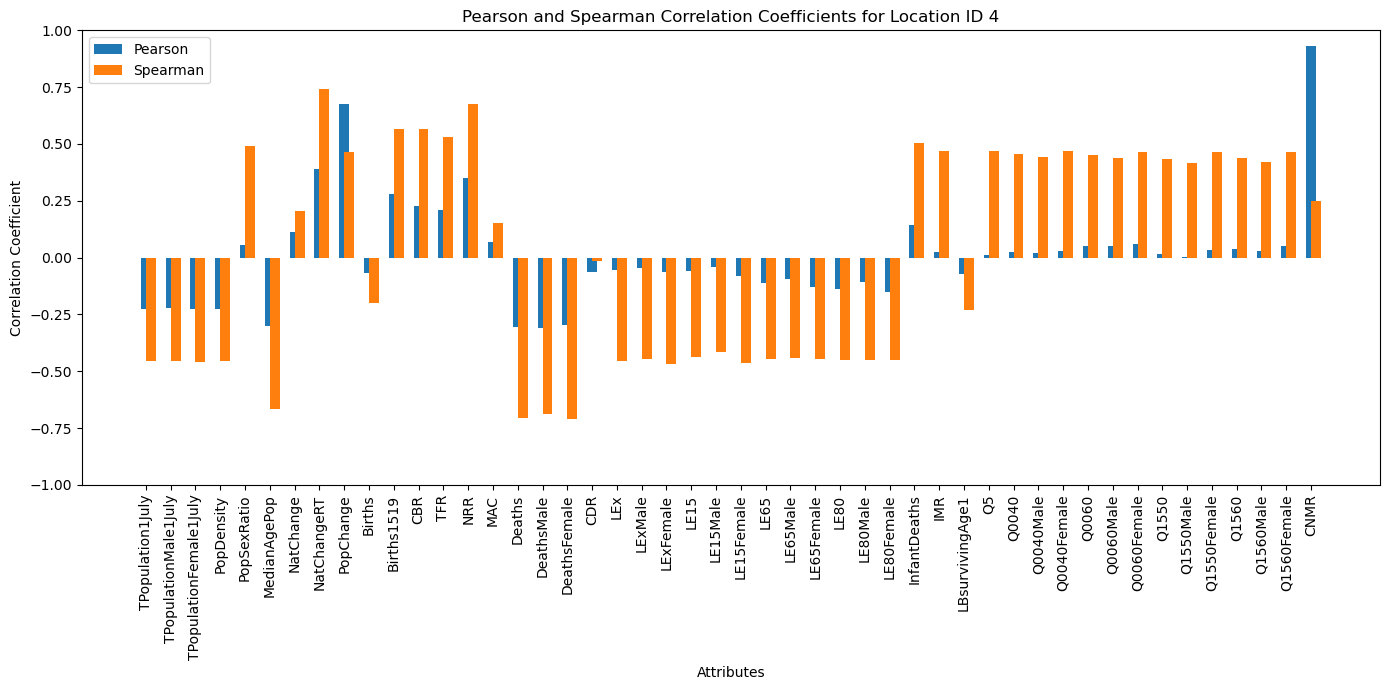

In [37]:
attributes = list(correlations.keys())
pearson_corrs = [correlations[attr]['pearson_corr'] for attr in attributes]
spearman_corrs = [correlations[attr]['spearman_corr'] for attr in attributes]


plt.figure(figsize=(14, 7))
x = range(len(attributes))

plt.bar(x, pearson_corrs, width=0.4, label='Pearson', align='center')
plt.bar(x, spearman_corrs, width=0.4, label='Spearman', align='edge')

plt.xlabel('Attributes')
plt.ylabel('Correlation Coefficient')
plt.title('Pearson and Spearman Correlation Coefficients for Location ID 4')
plt.xticks(x, attributes, rotation='vertical')
plt.ylim([-1, 1])
plt.legend()
plt.tight_layout()

plt.savefig('correlation_plot_locID_4.png')
plt.show()


In [38]:
def calculate_correlations(cleanTable1, LocID, attribute1, attribute2):
    
    location_data = cleanTable1[cleanTable1['LocID'] == locID]
    
    
    clean_data = location_data[[attribute1, attribute2]].dropna()
    
    if clean_data.empty:
        print(f"No valid data available to calculate correlation between {attribute1} and {attribute2} for LocID {locID}.")
        return
    
    
    pearson_corr, pearson_p_value = pearsonr(clean_data[attribute1], clean_data[attribute2])
    
    
    spearman_corr, spearman_p_value = spearmanr(clean_data[attribute1], clean_data[attribute2])
    
    print(f"Location ID: {locID}")
    print(f"Fixed Attribute: {attribute1}")
    print(f"Variable Attribute: {attribute2}")
    print("Pearson Correlation Coefficient:", pearson_corr)
    print("Pearson P-value:", pearson_p_value)
    print("Spearman Correlation Coefficient:", spearman_corr)
    print("Spearman P-value:", spearman_p_value)
    print("\n")
    
    return {
        'pearson_corr': pearson_corr,
        'pearson_p_value': pearson_p_value,
        'spearman_corr': spearman_corr,
        'spearman_p_value': spearman_p_value
    }


locID = 16
attribute1 = 'PopGrowthRate'
attributes = ['TPopulation1July', 'TPopulationMale1July', 'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
              'NatChange', 'NatChangeRT', 'PopChange', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC', 'Deaths',
              'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale', 'LExFemale', 'LE15', 'LE15Male', 'LE15Female',
              'LE65', 'LE65Male', 'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR', 'LBsurvivingAge1',
              'Q5', 'Q0040', 'Q0040Male', 'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550', 'Q1550Male',
              'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female', 'CNMR']


correlations = {}
for attribute2 in attributes:
    correlations[attribute2] = calculate_correlations(data, locID, attribute1, attribute2)


Location ID: 16
Fixed Attribute: PopGrowthRate
Variable Attribute: TPopulation1July
Pearson Correlation Coefficient: 0.19624517578792014
Pearson P-value: 0.015735497573417512
Spearman Correlation Coefficient: 0.3109645633451632
Spearman P-value: 0.00010180796649381548


Location ID: 16
Fixed Attribute: PopGrowthRate
Variable Attribute: TPopulationMale1July
Pearson Correlation Coefficient: 0.2227191065911806
Pearson P-value: 0.005983431644520492
Spearman Correlation Coefficient: 0.3364456337907115
Spearman P-value: 2.402606276576215e-05


Location ID: 16
Fixed Attribute: PopGrowthRate
Variable Attribute: TPopulationFemale1July
Pearson Correlation Coefficient: 0.16892843865331073
Pearson P-value: 0.03812542512954611
Spearman Correlation Coefficient: 0.28647513020783716
Spearman P-value: 0.0003623999634987407


Location ID: 16
Fixed Attribute: PopGrowthRate
Variable Attribute: PopDensity
Pearson Correlation Coefficient: 0.19624303374889776
Pearson P-value: 0.015736659060981404
Spearman Co

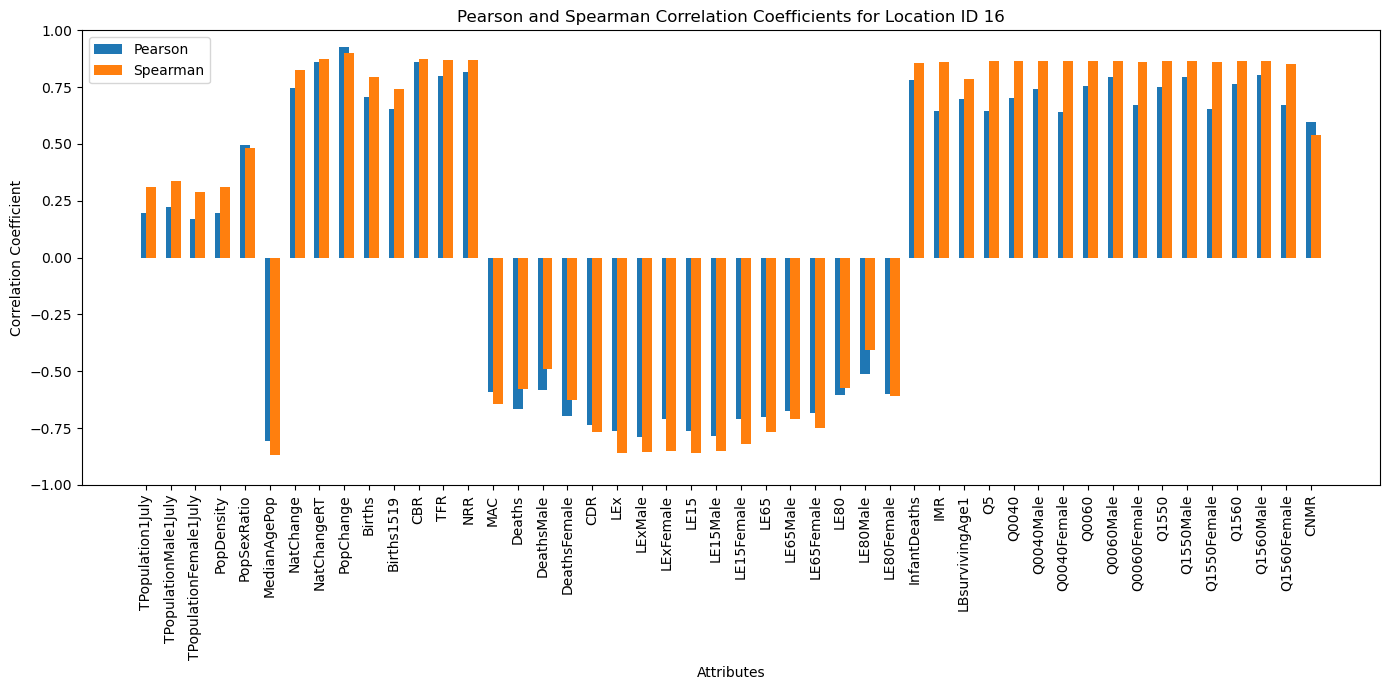

In [39]:
attributes = list(correlations.keys())
pearson_corrs = [correlations[attr]['pearson_corr'] for attr in attributes]
spearman_corrs = [correlations[attr]['spearman_corr'] for attr in attributes]


plt.figure(figsize=(14, 7))
x = range(len(attributes))

plt.bar(x, pearson_corrs, width=0.4, label='Pearson', align='center')
plt.bar(x, spearman_corrs, width=0.4, label='Spearman', align='edge')

plt.xlabel('Attributes')
plt.ylabel('Correlation Coefficient')
plt.title('Pearson and Spearman Correlation Coefficients for Location ID 16')
plt.xticks(x, attributes, rotation='vertical')
plt.ylim([-1, 1])
plt.legend()
plt.tight_layout()


plt.savefig('correlation_plot_locID_16.png')
plt.show()


# Overall Weighted pearsons and spearmans correlation

In [40]:
def calculate_pearson_correlation(cleanTable1, attribute1, attribute2):
    correlations = []
    
    unique_locations = cleanTable1['LocID'].unique()
    
    for locationID in unique_locations:
       
        location_data = cleanTable1[cleanTable1['LocID'] == locationID]
        
      
        clean_data1 = location_data[[attribute1, attribute2]].dropna()
        
        if clean_data1.empty:
            continue
        
        
        pearson_corr, _ = pearsonr(clean_data1[attribute1], clean_data1[attribute2])
        
        correlations.append((locationID, pearson_corr, len(clean_data1)))
    
    return correlations


def calculate_spearman_correlation(cleanTable1, attribute1, attribute2):
    correlations = []
    
    
    unique_locations = cleanTable1['LocID'].unique()
    
    for locationID in unique_locations:
        
        location_data = cleanTable1[cleanTable1['LocID'] == locationID]
        
        
        clean_data1 = location_data[[attribute1, attribute2]].dropna()
        
        if clean_data1.empty:
            continue
        
        
        spearman_corr, _ = spearmanr(clean_data1[attribute1], clean_data1[attribute2])
        
        
        correlations.append((locationID, spearman_corr, len(clean_data1)))
    
    return correlations


def weighted_average_correlation(correlations):
    total_weight = sum(weight for _, _, weight in correlations)
    weighted_sum = sum(corr * weight for _, corr, weight in correlations)
    
    if total_weight == 0:
        return None
    
    return weighted_sum / total_weight

attribute1 = 'PopGrowthRate'
attributes = ['TPopulation1July', 'TPopulationMale1July', 'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
              'NatChange', 'NatChangeRT', 'PopChange', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC', 'Deaths',
              'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale', 'LExFemale', 'LE15', 'LE15Male', 'LE15Female',
              'LE65', 'LE65Male', 'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR', 'LBsurvivingAge1',
              'Q5', 'Q0040', 'Q0040Male', 'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550', 'Q1550Male',
              'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female', 'CNMR']



for attribute2 in attributes:
    pearson_correlations = calculate_pearson_correlation(cleanTable1, attribute1, attribute2)
    spearman_correlations = calculate_spearman_correlation(cleanTable1, attribute1, attribute2)
    
    pearson_weighted_avg_corr = weighted_average_correlation(pearson_correlations)
    spearman_weighted_avg_corr = weighted_average_correlation(spearman_correlations)
    
    print(f"Weighted Average Pearson Correlation between {attribute1} and {attribute2}: {pearson_weighted_avg_corr}")
    print(f"Weighted Average Spearman Correlation between {attribute1} and {attribute2}: {spearman_weighted_avg_corr}")
    print("\n")


Weighted Average Pearson Correlation between PopGrowthRate and TPopulation1July: -0.6070118852816061
Weighted Average Spearman Correlation between PopGrowthRate and TPopulation1July: -0.5312823178519203


Weighted Average Pearson Correlation between PopGrowthRate and TPopulationMale1July: -0.6057417321963567
Weighted Average Spearman Correlation between PopGrowthRate and TPopulationMale1July: -0.5311917392223584


Weighted Average Pearson Correlation between PopGrowthRate and TPopulationFemale1July: -0.6067765247026501
Weighted Average Spearman Correlation between PopGrowthRate and TPopulationFemale1July: -0.530996260036963


Weighted Average Pearson Correlation between PopGrowthRate and PopDensity: -0.6070132122659229
Weighted Average Spearman Correlation between PopGrowthRate and PopDensity: -0.5312755049896628


Weighted Average Pearson Correlation between PopGrowthRate and PopSexRatio: 0.19445083977374844
Weighted Average Spearman Correlation between PopGrowthRate and PopSexRatio: 

C:\Users\leonp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\leonp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Weighted Average Pearson Correlation between PopGrowthRate and Births1519: nan
Weighted Average Spearman Correlation between PopGrowthRate and Births1519: nan


Weighted Average Pearson Correlation between PopGrowthRate and CBR: 0.8182859872957431
Weighted Average Spearman Correlation between PopGrowthRate and CBR: 0.8304453396457203


Weighted Average Pearson Correlation between PopGrowthRate and TFR: 0.7412452010076435
Weighted Average Spearman Correlation between PopGrowthRate and TFR: 0.6883428654001184


Weighted Average Pearson Correlation between PopGrowthRate and NRR: 0.7688206411322379
Weighted Average Spearman Correlation between PopGrowthRate and NRR: 0.6972237914949105


Weighted Average Pearson Correlation between PopGrowthRate and MAC: -0.27197623156710077
Weighted Average Spearman Correlation between PopGrowthRate and MAC: -0.3170430830090134


Weighted Average Pearson Correlation between PopGrowthRate and Deaths: -0.7590145261009615
Weighted Average Spearman Correlation

C:\Users\leonp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\leonp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Weighted Average Pearson Correlation between PopGrowthRate and InfantDeaths: nan
Weighted Average Spearman Correlation between PopGrowthRate and InfantDeaths: nan


Weighted Average Pearson Correlation between PopGrowthRate and IMR: 0.6811071445746081
Weighted Average Spearman Correlation between PopGrowthRate and IMR: 0.8169193623171958


Weighted Average Pearson Correlation between PopGrowthRate and LBsurvivingAge1: 0.1527529772184683
Weighted Average Spearman Correlation between PopGrowthRate and LBsurvivingAge1: 0.18821240958744753


Weighted Average Pearson Correlation between PopGrowthRate and Q5: 0.6629958744552609
Weighted Average Spearman Correlation between PopGrowthRate and Q5: 0.8167515920138061


Weighted Average Pearson Correlation between PopGrowthRate and Q0040: 0.6936472388308359
Weighted Average Spearman Correlation between PopGrowthRate and Q0040: 0.8115347998111839


Weighted Average Pearson Correlation between PopGrowthRate and Q0040Male: 0.6987414713218278
Weighte

C:\Users\leonp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\leonp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\leonp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\leonp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


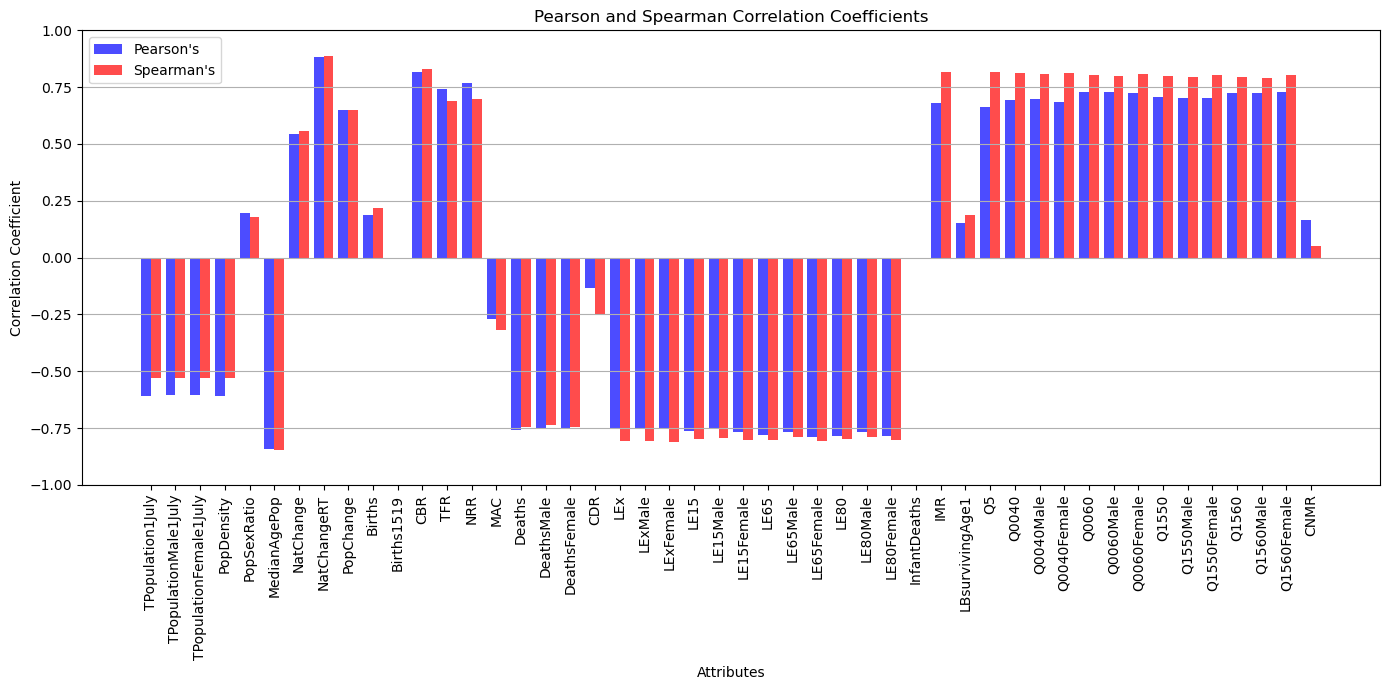

In [41]:
def calculate_pearson_correlation(cleanTable1, attribute1, attribute2):
    correlations = []
    
    
    unique_locations = cleanTable1['LocID'].unique()
    
    for locationID in unique_locations:
        
        location_data = cleanTable1[cleanTable1['LocID'] == locationID]
        
        
        clean_data1 = location_data[[attribute1, attribute2]].dropna()
        
        if clean_data1.empty:
            continue
        
        
        pearson_corr, _ = pearsonr(clean_data1[attribute1], clean_data1[attribute2])
        
        
        correlations.append((locationID, pearson_corr, len(clean_data1)))
    
    return correlations


def calculate_spearman_correlation(cleanTable1, attribute1, attribute2):
    correlations = []
    
    
    unique_locations = cleanTable1['LocID'].unique()
    
    for locationID in unique_locations:
        
        location_data = cleanTable1[cleanTable1['LocID'] == locationID]
        
        
        clean_data1 = location_data[[attribute1, attribute2]].dropna()
        
        if clean_data1.empty:
            continue
        
        
        spearman_corr, _ = spearmanr(clean_data1[attribute1], clean_data1[attribute2])
        
        
        correlations.append((locationID, spearman_corr, len(clean_data1)))
    
    return correlations


def weighted_average_correlation(correlations):
    total_weight = sum(weight for _, _, weight in correlations)
    weighted_sum = sum(corr * weight for _, corr, weight in correlations)
    
    if total_weight == 0:
        return None
    
    return weighted_sum / total_weight


attribute1 = 'PopGrowthRate'
attributes = ['TPopulation1July', 'TPopulationMale1July', 'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
              'NatChange', 'NatChangeRT', 'PopChange', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC', 'Deaths',
              'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale', 'LExFemale', 'LE15', 'LE15Male', 'LE15Female',
              'LE65', 'LE65Male', 'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR', 'LBsurvivingAge1',
              'Q5', 'Q0040', 'Q0040Male', 'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550', 'Q1550Male',
              'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female', 'CNMR']

correlations = {}


for attribute2 in attributes:
    pearson_correlations = calculate_pearson_correlation(cleanTable1, attribute1, attribute2)
    spearman_correlations = calculate_spearman_correlation(cleanTable1, attribute1, attribute2)
    
    pearson_weighted_avg_corr = weighted_average_correlation(pearson_correlations)
    spearman_weighted_avg_corr = weighted_average_correlation(spearman_correlations)
    
    correlations[attribute2] = {
        'pearson_corr': pearson_weighted_avg_corr,
        'spearman_corr': spearman_weighted_avg_corr
    }


attributes_list = list(correlations.keys())
pearson_corrs = [correlations[attr]['pearson_corr'] for attr in attributes_list]
spearman_corrs = [correlations[attr]['spearman_corr'] for attr in attributes_list]


plt.figure(figsize=(14, 7))
x = range(len(attributes_list))

plt.bar(x, pearson_corrs, width=0.4, label="Pearson's", align='center', color='b', alpha=0.7)
plt.bar([i + 0.4 for i in x], spearman_corrs, width=0.4, label="Spearman's", align='center', color='r', alpha=0.7)

plt.xlabel('Attributes')
plt.ylabel('Correlation Coefficient')
plt.title('Pearson and Spearman Correlation Coefficients')
plt.xticks([i + 0.2 for i in x], attributes_list, rotation='vertical')
plt.ylim([-1, 1])
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()


plt.savefig('correlation_plot_comparison.png')
plt.show()


# Model Creation 

# Polynomial Regression 

In [42]:
data_model = pd.read_csv('demographiccleaned.csv')

C:\Users\leonp\AppData\Local\Temp\ipykernel_16356\20130097.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_model = pd.read_csv('demographiccleaned.csv')


In [43]:
X = data_model[['LocID', 'LEx', 'TPopulation1July', 'Q1560', 'TFR', 'PopDensity', 'CNMR','NRR']]
y = data_model['PopGrowthRate']

In [44]:
cv = KFold(n_splits=10, shuffle=True, random_state=0)

In [45]:
model = Pipeline([
    ('scaler', StandardScaler()),       
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

In [46]:
def evaluate_model(model, X, y, cv):
    mse_scores = []
    mae_scores = []
    rmse_scores = []
    r2_scores = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = model.score(X_test, y_test)

        mse_scores.append(mse)
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

    mean_mse = np.mean(mse_scores)
    mean_mae = np.mean(mae_scores)
    mean_rmse = np.mean(rmse_scores)
    mean_r2 = np.mean(r2_scores)

    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - (1 - mean_r2) * (n - 1) / (n - p - 1)

    return mean_mse, mean_mae, mean_rmse, mean_r2, adj_r2


mse, mae, rmse, r2, adj_r2 = evaluate_model(model, X, y, cv)
print("Model: Polynomial Regression")
print(f"Mean Squared Error (Cross-Validation): {mse:.4f}")
print(f"Mean Absolute Error (Cross-Validation): {mae:.4f}")
print(f"Root Mean Squared Error (Cross-Validation): {rmse:.4f}")
print(f"R-squared (Cross-Validation): {r2:.4f}")
print(f"Adjusted R-squared (Cross-Validation): {adj_r2:.4f}")
print()

Model: Polynomial Regression
Mean Squared Error (Cross-Validation): 0.0991
Mean Absolute Error (Cross-Validation): 0.2368
Root Mean Squared Error (Cross-Validation): 0.3148
R-squared (Cross-Validation): 0.9437
Adjusted R-squared (Cross-Validation): 0.9437



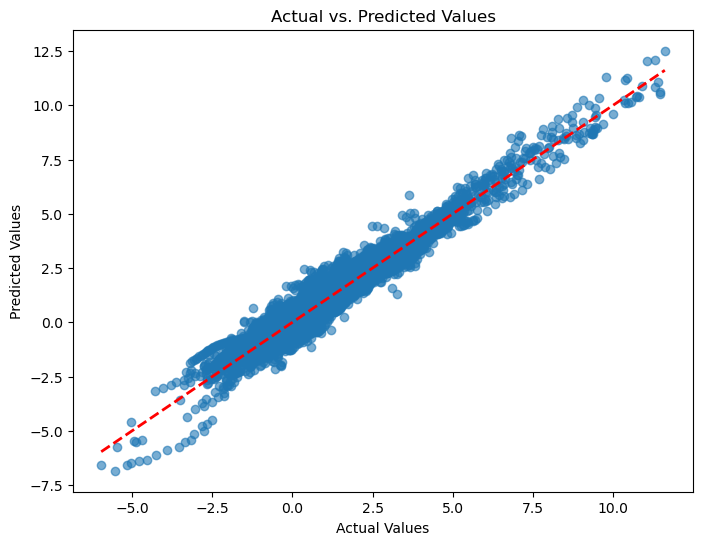

In [47]:
def plot_actual_vs_predicted(model, X, y, cv):
    y_true = []
    y_pred = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_true.extend(y_test)
        y_pred.extend(model.predict(X_test))

    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()


plot_actual_vs_predicted(model, X, y, cv)

# Decision Tree Regression 

In [48]:
data_model2 = pd.read_csv('demographiccleaned.csv')

C:\Users\leonp\AppData\Local\Temp\ipykernel_16356\3739775536.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_model2 = pd.read_csv('demographiccleaned.csv')


In [49]:
X = data_model2[['LocID', 'LEx', 'TPopulation1July', 'Q1560', 'TFR', 'PopDensity', 'CNMR','NRR']]
y = data_model2['PopGrowthRate'] 

In [50]:
cv = KFold(n_splits=10, shuffle=True, random_state=0)

In [51]:
model1 = Pipeline([
    ('scaler', StandardScaler()),        
    ('tree', DecisionTreeRegressor(max_depth=5))  
])


In [52]:
def evaluate_model(model1, X, y, cv):
    mse_scores = []
    mae_scores = []
    rmse_scores = []
    r2_scores = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model1.fit(X_train, y_train)
        y_pred = model1.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = model1.score(X_test, y_test)

        mse_scores.append(mse)
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

    mean_mse = np.mean(mse_scores)
    mean_mae = np.mean(mae_scores)
    mean_rmse = np.mean(rmse_scores)
    mean_r2 = np.mean(r2_scores)

    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - (1 - mean_r2) * (n - 1) / (n - p - 1)

    return mean_mse, mean_mae, mean_rmse, mean_r2, adj_r2

mse, mae, rmse, r2, adj_r2 = evaluate_model(model1, X, y, cv)
print("Model: Decision Tree Regression")
print(f"Mean Squared Error (Cross-Validation): {mse:.4f}")
print(f"Mean Absolute Error (Cross-Validation): {mae:.4f}")
print(f"Root Mean Squared Error (Cross-Validation): {rmse:.4f}")
print(f"R-squared (Cross-Validation): {r2:.4f}")
print(f"Adjusted R-squared (Cross-Validation): {adj_r2:.4f}")
print()


Model: Decision Tree Regression
Mean Squared Error (Cross-Validation): 0.2119
Mean Absolute Error (Cross-Validation): 0.3461
Root Mean Squared Error (Cross-Validation): 0.4603
R-squared (Cross-Validation): 0.8797
Adjusted R-squared (Cross-Validation): 0.8797



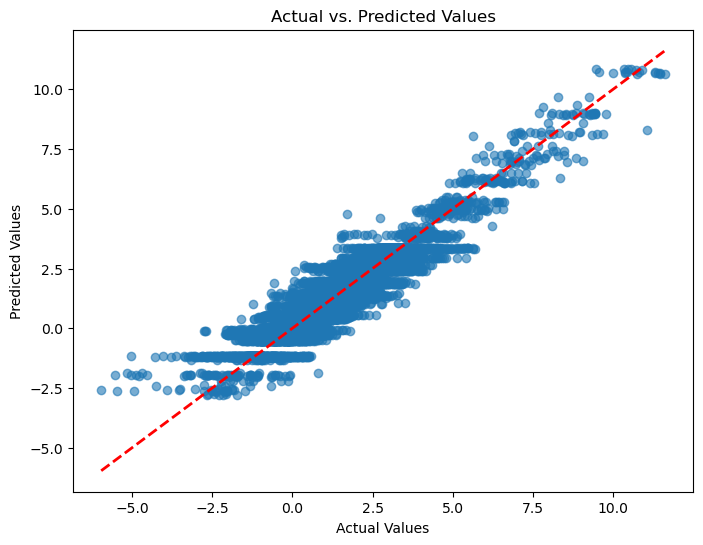

In [53]:
def plot_actual_vs_predicted(model1, X, y, cv):
    y_true = []
    y_pred = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model1.fit(X_train, y_train)
        y_true.extend(y_test)
        y_pred.extend(model1.predict(X_test))

    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()



# Plot Actual vs. Predicted values
plot_actual_vs_predicted(model1, X, y, cv)


# Gradient Boosting Regression

In [54]:
data_model3 = pd.read_csv('demographiccleaned.csv')

C:\Users\leonp\AppData\Local\Temp\ipykernel_16356\994727092.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_model3 = pd.read_csv('demographiccleaned.csv')


In [55]:
X = data_model3[['LocID', 'LEx', 'TPopulation1July', 'Q1560', 'TFR', 'PopDensity', 'CNMR','NRR']]
y = data_model3['PopGrowthRate'] 

In [56]:
cv = KFold(n_splits=10, shuffle=True, random_state=0)

In [57]:
model3 = Pipeline([
    ('scaler', StandardScaler()),           
    ('gbr', GradientBoostingRegressor())    
])

In [58]:
def evaluate_model(model3, X, y, cv):
    mse_scores = []
    mae_scores = []
    rmse_scores = []
    r2_scores = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model3.fit(X_train, y_train)
        y_pred = model3.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = model3.score(X_test, y_test)

        mse_scores.append(mse)
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

    mean_mse = np.mean(mse_scores)
    mean_mae = np.mean(mae_scores)
    mean_rmse = np.mean(rmse_scores)
    mean_r2 = np.mean(r2_scores)

    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - (1 - mean_r2) * (n - 1) / (n - p - 1)

    return mean_mse, mean_mae, mean_rmse, mean_r2, adj_r2

mse, mae, rmse, r2, adj_r2 = evaluate_model(model3, X, y, cv)
print("Model: Gradient Boost Regression")
print(f"Mean Squared Error (Cross-Validation): {mse:.4f}")
print(f"Mean Absolute Error (Cross-Validation): {mae:.4f}")
print(f"Root Mean Squared Error (Cross-Validation): {rmse:.4f}")
print(f"R-squared (Cross-Validation): {r2:.4f}")
print(f"Adjusted R-squared (Cross-Validation): {adj_r2:.4f}")
print()


Model: Gradient Boost Regression
Mean Squared Error (Cross-Validation): 0.0775
Mean Absolute Error (Cross-Validation): 0.2054
Root Mean Squared Error (Cross-Validation): 0.2784
R-squared (Cross-Validation): 0.9559
Adjusted R-squared (Cross-Validation): 0.9559



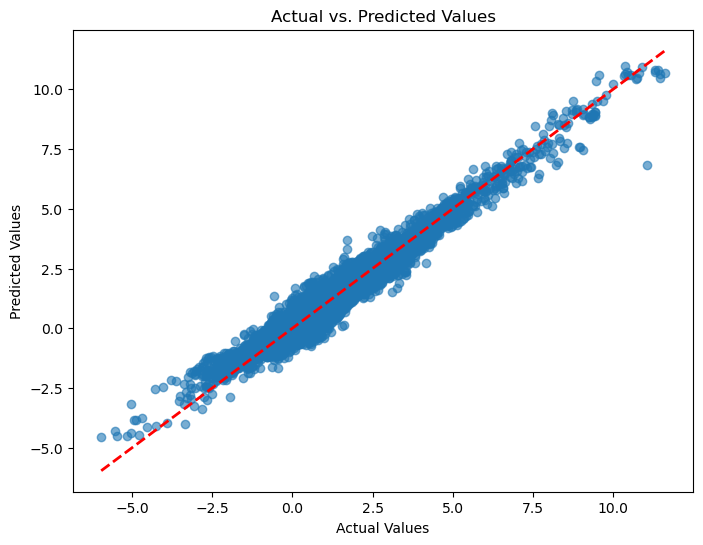

In [59]:
def plot_actual_vs_predicted(model3, X, y, cv):
    y_true = []
    y_pred = []
    
    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model3.fit(X_train, y_train)
        y_true.extend(y_test)
        y_pred.extend(model3.predict(X_test))
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()

mse, mae, rmse, r2, adj_r2 = evaluate_model(model3, X, y, cv)


plot_actual_vs_predicted(model3, X, y, cv)


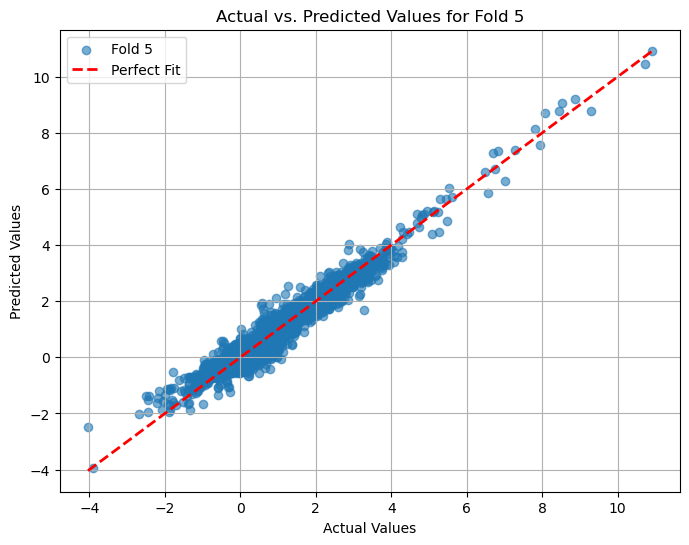

In [60]:
def plot_actual_vs_predicted_for_fold(model3, X, y, cv, fold_number):
    y_true = []
    y_pred = []
    
    fold_predictions = []
    fold_true_values = []
    
    for i, (train_index, test_index) in enumerate(cv.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model3.fit(X_train, y_train)
        y_pred_fold = model3.predict(X_test)

        
        fold_predictions.append(y_pred_fold)
        fold_true_values.append(y_test)

        if i == fold_number:
            y_true = y_test
            y_pred = y_pred_fold

    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, label=f'Fold {fold_number + 1}')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2, label='Perfect Fit')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs. Predicted Values for Fold {fold_number + 1}')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_actual_vs_predicted_for_fold(model3, X, y, cv, fold_number=4)

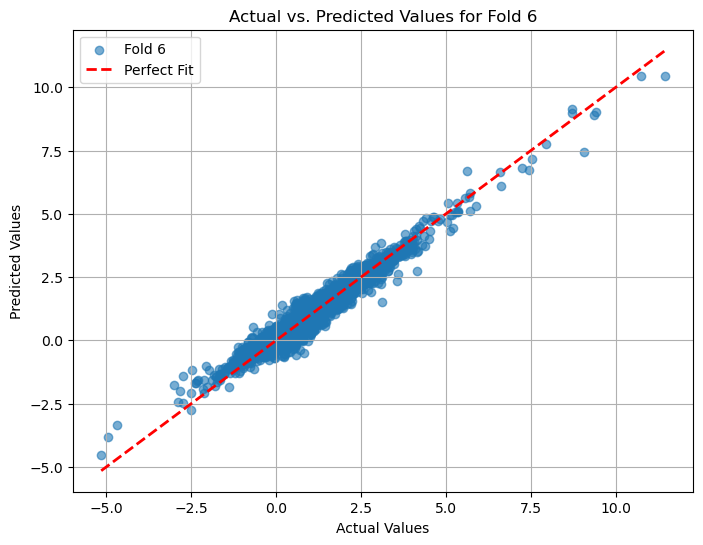

In [61]:
def plot_actual_vs_predicted_for_fold(model3, X, y, cv, fold_number):
    y_true = []
    y_pred = []
    
    
    fold_predictions = []
    fold_true_values = []
    
    for i, (train_index, test_index) in enumerate(cv.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model3.fit(X_train, y_train)
        y_pred_fold = model3.predict(X_test)

        
        fold_predictions.append(y_pred_fold)
        fold_true_values.append(y_test)

        
        if i == fold_number:
            y_true = y_test
            y_pred = y_pred_fold

    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, label=f'Fold {fold_number + 1}')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2, label='Perfect Fit')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs. Predicted Values for Fold {fold_number + 1}')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_actual_vs_predicted_for_fold(model3, X, y, cv, fold_number=5)

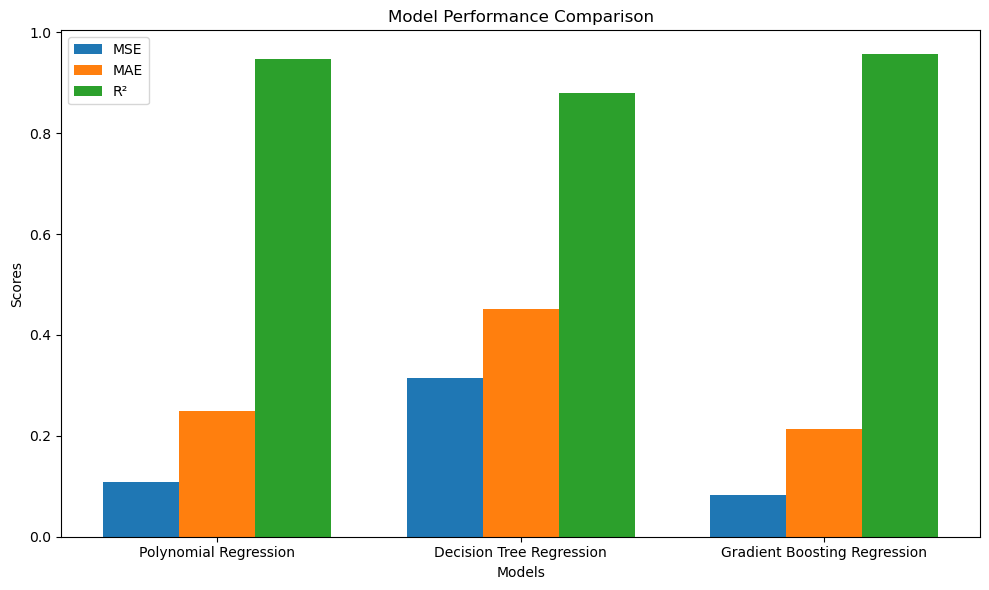

In [62]:
models = ['Polynomial Regression', 'Decision Tree Regression', 'Gradient Boosting Regression']
mse = [0.1085, 0.3146, 0.0829]
mae = [0.2499, 0.4508, 0.2141]
r2 = [0.9464, 0.8796, 0.9559]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = np.arange(len(models))

bars_mse = ax.bar(index - bar_width, mse, bar_width, label='MSE')
bars_mae = ax.bar(index, mae, bar_width, label='MAE')
bars_r2 = ax.bar(index + bar_width, r2, bar_width, label='R²')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


# Future Predictions Based on Best Model 

In [63]:
initial_data1 = data_model3[data_model3['Time'] < 2101].copy()  # Used data from 1950 to 2100

In [64]:
predictors = ['LocID', 'LEx', 'TPopulation1July', 'Q1560', 'TFR', 'PopDensity', 'CNMR','NRR']
target = ['PopGrowthRate']

In [65]:
X = initial_data1[predictors]
y = initial_data1[target]

In [66]:
future_years = np.arange(2101, 2111)  

future_data = []

for location_id in data_model3['LocID'].unique():
    
    location_data = initial_data1[initial_data1['LocID'] == location_id]

    future_df = pd.DataFrame(columns=['LocID', 'Time'] + predictors + [target])

    current_data = location_data.sort_values(by='Time').iloc[-1].copy()

    for year in future_years:
        
        current_data['Time'] = year
        current_data['LocID'] = location_id

        
        future_X = pd.DataFrame([current_data[predictors]], columns=predictors)

        X = location_data[predictors]
        y = location_data[target]
        model3.fit(X, y)

        prediction = model3.predict(future_X)[0]

        current_data[target] = prediction

        future_data.append({
            'LocID': location_id,
            'Time': year,
            'Predicted_PopGrowthRate': prediction
        })

    
        location_data = pd.concat([location_data, pd.DataFrame([current_data])], ignore_index=True)

future_df = pd.DataFrame(future_data)

print(future_df[['LocID', 'Time', 'Predicted_PopGrowthRate']])


C:\Users\leonp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\leonp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\leonp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\leonp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

      LocID  Time  Predicted_PopGrowthRate
0         4  2101                 0.235123
1         4  2102                 0.238850
2         4  2103                 0.240812
3         4  2104                 0.242483
4         4  2105                 0.241653
5         4  2106                 0.243698
6         4  2107                 0.246232
7         4  2108                 0.247896
8         4  2109                 0.246945
9         4  2110                 0.245412
10        8  2101                -2.394666
11        8  2102                -2.392386
12        8  2103                -2.391637
13        8  2104                -2.391255
14        8  2105                -2.391280
15        8  2106                -2.389979
16        8  2107                -2.389984
17        8  2108                -2.390289
18        8  2109                -2.389660
19        8  2110                -2.389568
20       12  2101                -0.077473
21       12  2102                -0.074530
22       12

In [67]:
future_df = future_df.rename(columns={'Predicted_PopGrowthRate': 'PopGrowthRate'})

combined_df = pd.concat([data_model3, future_df], ignore_index=True)

combined_df = combined_df.sort_values(by=['LocID', 'Time']).reset_index(drop=True)

combined_df.to_csv('combined_data_with_future_predictions.csv', index=False)

print("Combined DataFrame saved to 'combined_data_with_future_predictions.csv'")


Combined DataFrame saved to 'combined_data_with_future_predictions.csv'


In [68]:
predicted_data = pd.read_csv('combined_data_with_future_predictions.csv')
pd.set_option('display.max_columns', None)
predicted_data.head(200)

C:\Users\leonp\AppData\Local\Temp\ipykernel_16356\2274282379.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  predicted_data = pd.read_csv('combined_data_with_future_predictions.csv')


Unnamed: 0  SortOrder  LocID Notes ISO3_code ISO2_code  SDMX_code  \
0           0.0      108.0      4   NaN       AFG        AF        4.0   
1           1.0      108.0      4   NaN       AFG        AF        4.0   
2           2.0      108.0      4   NaN       AFG        AF        4.0   
3           3.0      108.0      4   NaN       AFG        AF        4.0   
4           4.0      108.0      4   NaN       AFG        AF        4.0   
5           5.0      108.0      4   NaN       AFG        AF        4.0   
6           6.0      108.0      4   NaN       AFG        AF        4.0   
7           7.0      108.0      4   NaN       AFG        AF        4.0   
8           8.0      108.0      4   NaN       AFG        AF        4.0   
9           9.0      108.0      4   NaN       AFG        AF        4.0   
10         10.0      108.0      4   NaN       AFG        AF        4.0   
11         11.0      108.0      4   NaN       AFG        AF        4.0   
12         12.0      108.0      4   NaN       AFG        AF        4.0   
13         13.0      108.0      4   NaN       AFG        AF        4.0   
14         14.0      108.0      4   NaN       AFG        AF        4.0   
15         15.0      108.0      4   NaN       AFG        AF        4.0   
16         16.0      108.0      4   NaN       AFG        AF        4.0   
17         17.0      108.0      4   NaN       AFG        AF        4.0   
18         18.0      108.0      4   NaN       AFG        AF        4.0   
19         19.0      108.0      4   NaN       AFG        AF        4.0   
20         20.0      108.0      4   NaN       AFG        AF        4.0   
21         21.0      108.0      4   NaN       AFG        AF        4.0   
22         22.0      108.0      4   NaN       AFG        AF        4.0   
23         23.0      108.0      4   NaN       AFG        AF        4.0   
24         24.0      108.0      4   NaN       AFG        AF        4.0   
25         25.0      108.0      4   NaN       AFG        AF        4.0   
26         26.0      108.0      4   NaN       AFG        AF        4.0   
27         27.0      108.0      4   NaN       AFG        AF        4.0   
28         28.0      108.0      4   NaN       AFG        AF        4.0   
29         29.0      108.0      4   NaN       AFG        AF        4.0   
30         30.0      108.0      4   NaN       AFG        AF        4.0   
31         31.0      108.0      4   NaN       AFG        AF        4.0   
32         32.0      108.0      4   NaN       AFG        AF        4.0   
33         33.0      108.0      4   NaN       AFG        AF        4.0   
34         34.0      108.0      4   NaN       AFG        AF        4.0   
35         35.0      108.0      4   NaN       AFG        AF        4.0   
36         36.0      108.0      4   NaN       AFG        AF        4.0   
37         37.0      108.0      4   NaN       AFG        AF        4.0   
38         38.0      108.0      4   NaN       AFG        AF        4.0   
39         39.0      108.0      4   NaN       AFG        AF        4.0   
40         40.0      108.0      4   NaN       AFG        AF        4.0   
41         41.0      108.0      4   NaN       AFG        AF        4.0   
42         42.0      108.0      4   NaN       AFG        AF        4.0   
43         43.0      108.0      4   NaN       AFG        AF        4.0   
44         44.0      108.0      4   NaN       AFG        AF        4.0   
45         45.0      108.0      4   NaN       AFG        AF        4.0   
46         46.0      108.0      4   NaN       AFG        AF        4.0   
47         47.0      108.0      4   NaN       AFG        AF        4.0   
48         48.0      108.0      4   NaN       AFG        AF        4.0   
49         49.0      108.0      4   NaN       AFG        AF        4.0   
50         50.0      108.0      4   NaN       AFG        AF        4.0   
51         51.0      108.0      4   NaN       AFG        AF        4.0   
52         52.0      108.0      4   NaN       AFG        AF        4.0   
53       

In [69]:
predicted_data.shape


(42028, 68)

In [70]:

predicted_data.to_csv('predicted_population_growth.csv', index=False)


# Polynomial Regression with higher Degrees 

In [76]:
data_model = pd.read_csv('demographiccleaned.csv')

C:\Users\leonp\AppData\Local\Temp\ipykernel_16356\20130097.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_model = pd.read_csv('demographiccleaned.csv')


In [77]:
X = data_model[['LocID', 'LEx', 'TPopulation1July', 'Q1560', 'TFR', 'PopDensity', 'CNMR','NRR']]
y = data_model['PopGrowthRate']

In [78]:
cv = KFold(n_splits=10, shuffle=True, random_state=0)

In [83]:
model = Pipeline([
    ('scaler', StandardScaler()),       
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])

In [84]:
def evaluate_model(model, X, y, cv):
    mse_scores = []
    mae_scores = []
    rmse_scores = []
    r2_scores = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = model.score(X_test, y_test)

        mse_scores.append(mse)
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

    mean_mse = np.mean(mse_scores)
    mean_mae = np.mean(mae_scores)
    mean_rmse = np.mean(rmse_scores)
    mean_r2 = np.mean(r2_scores)

    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - (1 - mean_r2) * (n - 1) / (n - p - 1)

    return mean_mse, mean_mae, mean_rmse, mean_r2, adj_r2


mse, mae, rmse, r2, adj_r2 = evaluate_model(model, X, y, cv)
print("Model: Polynomial Regression")
print(f"Mean Squared Error (Cross-Validation): {mse:.4f}")
print(f"Mean Absolute Error (Cross-Validation): {mae:.4f}")
print(f"Root Mean Squared Error (Cross-Validation): {rmse:.4f}")
print(f"R-squared (Cross-Validation): {r2:.4f}")
print(f"Adjusted R-squared (Cross-Validation): {adj_r2:.4f}")
print()

Model: Polynomial Regression
Mean Squared Error (Cross-Validation): 0.0842
Mean Absolute Error (Cross-Validation): 0.2121
Root Mean Squared Error (Cross-Validation): 0.2902
R-squared (Cross-Validation): 0.9522
Adjusted R-squared (Cross-Validation): 0.9521



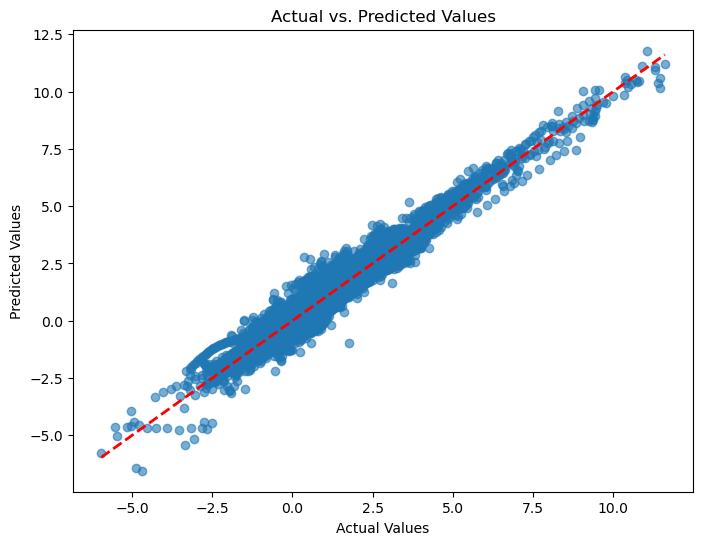

In [85]:
def plot_actual_vs_predicted(model, X, y, cv):
    y_true = []
    y_pred = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_true.extend(y_test)
        y_pred.extend(model.predict(X_test))

    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()


plot_actual_vs_predicted(model, X, y, cv)

In [86]:
data_model = pd.read_csv('demographiccleaned.csv')

C:\Users\leonp\AppData\Local\Temp\ipykernel_16356\20130097.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_model = pd.read_csv('demographiccleaned.csv')


In [87]:
X = data_model[['LocID', 'LEx', 'TPopulation1July', 'Q1560', 'TFR', 'PopDensity', 'CNMR','NRR']]
y = data_model['PopGrowthRate']

In [88]:
cv = KFold(n_splits=10, shuffle=True, random_state=0)

In [89]:
model = Pipeline([
    ('scaler', StandardScaler()),       
    ('poly', PolynomialFeatures(degree=4)),
    ('linear', LinearRegression())
])

In [90]:
def evaluate_model(model, X, y, cv):
    mse_scores = []
    mae_scores = []
    rmse_scores = []
    r2_scores = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = model.score(X_test, y_test)

        mse_scores.append(mse)
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

    mean_mse = np.mean(mse_scores)
    mean_mae = np.mean(mae_scores)
    mean_rmse = np.mean(rmse_scores)
    mean_r2 = np.mean(r2_scores)

    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - (1 - mean_r2) * (n - 1) / (n - p - 1)

    return mean_mse, mean_mae, mean_rmse, mean_r2, adj_r2


mse, mae, rmse, r2, adj_r2 = evaluate_model(model, X, y, cv)
print("Model: Polynomial Regression")
print(f"Mean Squared Error (Cross-Validation): {mse:.4f}")
print(f"Mean Absolute Error (Cross-Validation): {mae:.4f}")
print(f"Root Mean Squared Error (Cross-Validation): {rmse:.4f}")
print(f"R-squared (Cross-Validation): {r2:.4f}")
print(f"Adjusted R-squared (Cross-Validation): {adj_r2:.4f}")
print()

Model: Polynomial Regression
Mean Squared Error (Cross-Validation): 0.0770
Mean Absolute Error (Cross-Validation): 0.1913
Root Mean Squared Error (Cross-Validation): 0.2770
R-squared (Cross-Validation): 0.9563
Adjusted R-squared (Cross-Validation): 0.9563



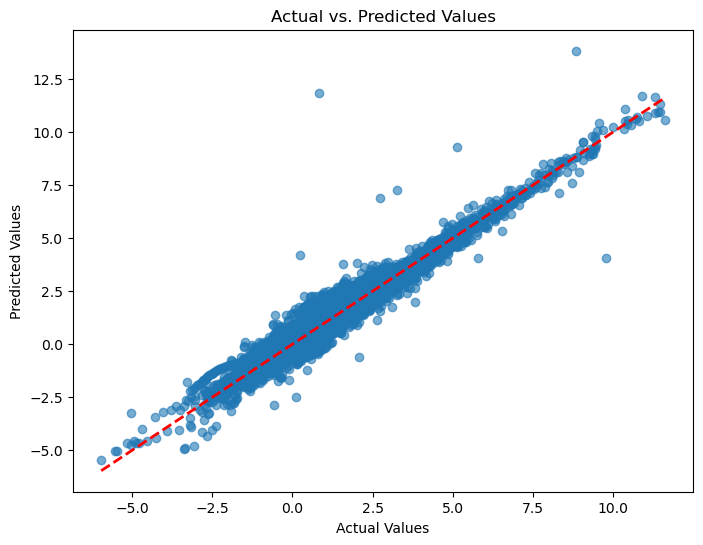

In [91]:
def plot_actual_vs_predicted(model, X, y, cv):
    y_true = []
    y_pred = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_true.extend(y_test)
        y_pred.extend(model.predict(X_test))

    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()


plot_actual_vs_predicted(model, X, y, cv)

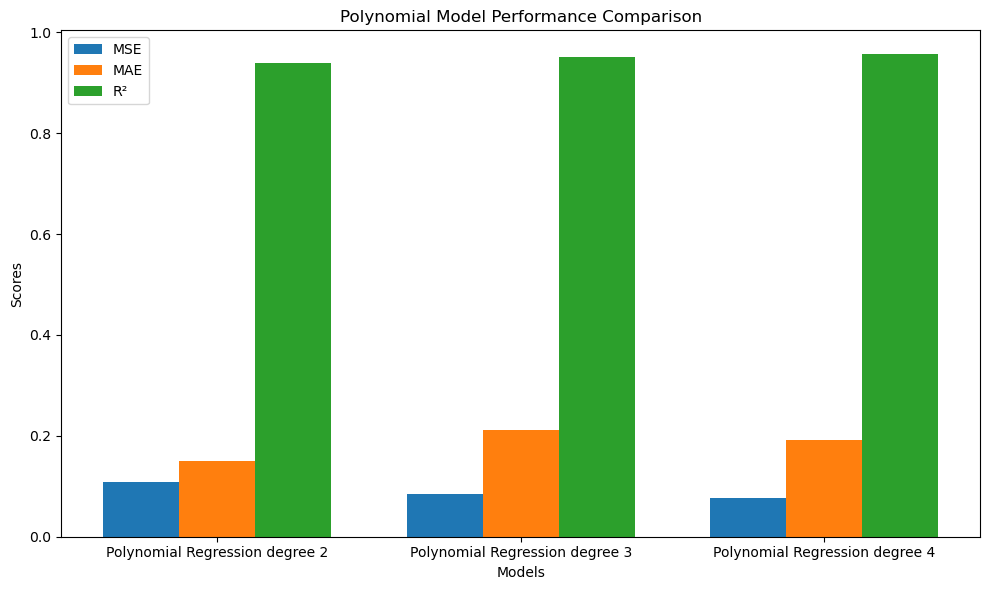

In [108]:
models = ['Polynomial Regression degree 2', 'Polynomial Regression degree 3', 'Polynomial Regression degree 4']
mse = [0.1086, 0.0842, 0.0770]
mae = [0.1499, 0.2121, 0.1913]
r2 = [0.9384, 0.9521, 0.9563]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = np.arange(len(models))

bars_mse = ax.bar(index - bar_width, mse, bar_width, label='MSE')
bars_mae = ax.bar(index, mae, bar_width, label='MAE')
bars_r2 = ax.bar(index + bar_width, r2, bar_width, label='R²')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Polynomial Model Performance Comparison')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

# Decision Tree regression with higher depths 

In [92]:
data_model2 = pd.read_csv('demographiccleaned.csv')

C:\Users\leonp\AppData\Local\Temp\ipykernel_16356\3739775536.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_model2 = pd.read_csv('demographiccleaned.csv')


In [93]:
X = data_model2[['LocID', 'LEx', 'TPopulation1July', 'Q1560', 'TFR', 'PopDensity', 'CNMR','NRR']]
y = data_model2['PopGrowthRate'] 

In [94]:
cv = KFold(n_splits=10, shuffle=True, random_state=0)

In [98]:
model1 = Pipeline([
    ('scaler', StandardScaler()),        
    ('tree', DecisionTreeRegressor(max_depth=7))  
])

In [99]:
def evaluate_model(model1, X, y, cv):
    mse_scores = []
    mae_scores = []
    rmse_scores = []
    r2_scores = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model1.fit(X_train, y_train)
        y_pred = model1.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = model1.score(X_test, y_test)

        mse_scores.append(mse)
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

    mean_mse = np.mean(mse_scores)
    mean_mae = np.mean(mae_scores)
    mean_rmse = np.mean(rmse_scores)
    mean_r2 = np.mean(r2_scores)

    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - (1 - mean_r2) * (n - 1) / (n - p - 1)

    return mean_mse, mean_mae, mean_rmse, mean_r2, adj_r2

mse, mae, rmse, r2, adj_r2 = evaluate_model(model1, X, y, cv)
print("Model: Decision Tree Regression")
print(f"Mean Squared Error (Cross-Validation): {mse:.4f}")
print(f"Mean Absolute Error (Cross-Validation): {mae:.4f}")
print(f"Root Mean Squared Error (Cross-Validation): {rmse:.4f}")
print(f"R-squared (Cross-Validation): {r2:.4f}")
print(f"Adjusted R-squared (Cross-Validation): {adj_r2:.4f}")

Model: Decision Tree Regression
Mean Squared Error (Cross-Validation): 0.1242
Mean Absolute Error (Cross-Validation): 0.2645
Root Mean Squared Error (Cross-Validation): 0.3524
R-squared (Cross-Validation): 0.9294
Adjusted R-squared (Cross-Validation): 0.9294


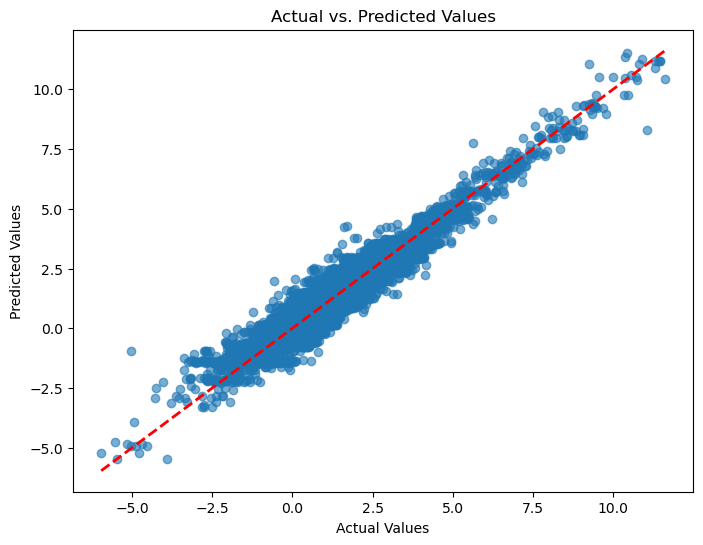

In [100]:
def plot_actual_vs_predicted(model1, X, y, cv):
    y_true = []
    y_pred = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model1.fit(X_train, y_train)
        y_true.extend(y_test)
        y_pred.extend(model1.predict(X_test))

    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()



# Plot Actual vs. Predicted values
plot_actual_vs_predicted(model1, X, y, cv)

In [101]:
data_model2 = pd.read_csv('demographiccleaned.csv')

C:\Users\leonp\AppData\Local\Temp\ipykernel_16356\3739775536.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_model2 = pd.read_csv('demographiccleaned.csv')


In [102]:
X = data_model2[['LocID', 'LEx', 'TPopulation1July', 'Q1560', 'TFR', 'PopDensity', 'CNMR','NRR']]
y = data_model2['PopGrowthRate'] 

In [103]:
cv = KFold(n_splits=10, shuffle=True, random_state=0)

In [104]:
model1 = Pipeline([
    ('scaler', StandardScaler()),        
    ('tree', DecisionTreeRegressor(max_depth=10))  
])

In [105]:
def evaluate_model(model1, X, y, cv):
    mse_scores = []
    mae_scores = []
    rmse_scores = []
    r2_scores = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model1.fit(X_train, y_train)
        y_pred = model1.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = model1.score(X_test, y_test)

        mse_scores.append(mse)
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

    mean_mse = np.mean(mse_scores)
    mean_mae = np.mean(mae_scores)
    mean_rmse = np.mean(rmse_scores)
    mean_r2 = np.mean(r2_scores)

    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - (1 - mean_r2) * (n - 1) / (n - p - 1)

    return mean_mse, mean_mae, mean_rmse, mean_r2, adj_r2

mse, mae, rmse, r2, adj_r2 = evaluate_model(model1, X, y, cv)
print("Model: Decision Tree Regression")
print(f"Mean Squared Error (Cross-Validation): {mse:.4f}")
print(f"Mean Absolute Error (Cross-Validation): {mae:.4f}")
print(f"Root Mean Squared Error (Cross-Validation): {rmse:.4f}")
print(f"R-squared (Cross-Validation): {r2:.4f}")
print(f"Adjusted R-squared (Cross-Validation): {adj_r2:.4f}")
print()

Model: Decision Tree Regression
Mean Squared Error (Cross-Validation): 0.0752
Mean Absolute Error (Cross-Validation): 0.1958
Root Mean Squared Error (Cross-Validation): 0.2742
R-squared (Cross-Validation): 0.9573
Adjusted R-squared (Cross-Validation): 0.9573



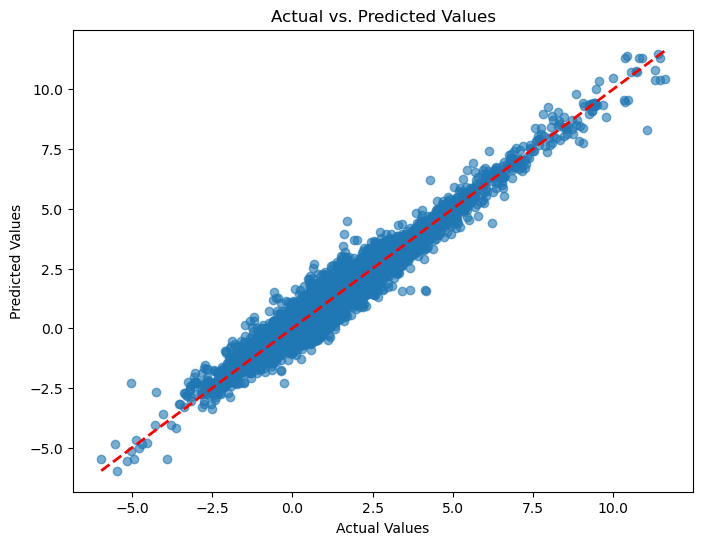

In [106]:
def plot_actual_vs_predicted(model1, X, y, cv):
    y_true = []
    y_pred = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model1.fit(X_train, y_train)
        y_true.extend(y_test)
        y_pred.extend(model1.predict(X_test))

    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()



# Plot Actual vs. Predicted values
plot_actual_vs_predicted(model1, X, y, cv)

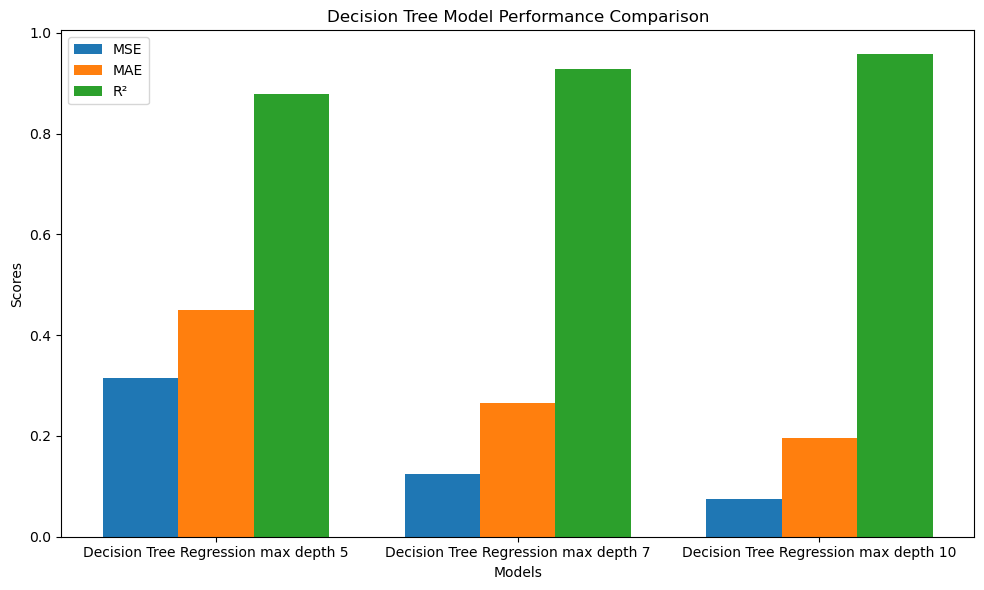

In [110]:
models = ['Decision Tree Regression max depth 5', 'Decision Tree Regression max depth 7', 'Decision Tree Regression max depth 10']
mse = [0.3146, 0.1242, 0.0752]
mae = [0.4508, 0.2645, 0.1958]
r2 = [0.8796, 0.9294, 0.9573]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = np.arange(len(models))

bars_mse = ax.bar(index - bar_width, mse, bar_width, label='MSE')
bars_mae = ax.bar(index, mae, bar_width, label='MAE')
bars_r2 = ax.bar(index + bar_width, r2, bar_width, label='R²')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Decision Tree Model Performance Comparison')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()